## <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">Project Assignment : Ensemble Techniques

## <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Domain:  Medicine

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Context:
<font color=darkblue>Parkinson’s Disease (PD) is a degenerative neurological disorder marked by decreased dopamine levels in the brain. It manifests itself through a deterioration of movement, including the presence of tremors and stiffness. There is commonly a marked effect on speech, including dysarthria (difficulty articulating sounds), hypophonia (lowered volume), and monotone (reduced pitch range). Additionally, cognitive impairments and changes in mood can occur, and risk of dementia is increased.

Traditional diagnosis of Parkinson’s Disease involves a clinician taking a neurological history of the patient and observing motor skills in various situations. Since there is no definitive laboratory test to diagnose PD, diagnosis is often difficult, particularly in the early stages when motor effects are not yet severe. Monitoring progression of the disease over time requires repeated clinic visits by the patient. An effective screening process, particularly one that doesn’t require a clinic visit, would be beneficial. Since PD patients exhibit characteristic vocal features, voice recordings are a useful and non-invasive tool for diagnosis. If machine learning algorithms could be applied to a voice recording dataset to accurately diagnosis PD, this would be an effective screening step prior to an appointment with a clinician
</font> 

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Attribute Information:
<font color=darkblue>
<b>name :</b> ASCII subject name and recording number
<br><b>MDVP:Fo(Hz) :</b> Average vocal fundamental frequency
<br><b>MDVP:Fhi(Hz) :</b> Maximum vocal fundamental frequency
<br><b>MDVP:Flo(Hz) :</b> Minimum vocal fundamental frequency
    <br><b>MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP :</b>Several measures of variation in fundamental frequency
    <br><b>MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA :</b> Several measures of variation in amplitude
<br><b>NHR,HNR :</b> Two measures of ratio of noise to tonal components in the voice
<br><b>status :</b> Health status of the subject (one) - Parkinson's, (zero) - healthy
<br><b>RPDE,D2 :</b> Two nonlinear dynamical complexity measures
<br><b>DFA :</b> Signal fractal scaling exponent
<br><b>spread1,spread2,PPE :</b> Three nonlinear measures of fundamental frequency variation 9. car name: string (unique for each instance)
</font> 

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Learning Outcomes:
<font color=darkblue>
<ul>
<li>Exploratory Data Analysis</li>
<li>Supervised Learning</li>
<li>Ensemble Learning</li>
</ul>
</font> 

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Objective:
<font color=darkblue>Goal is to classify the patients into the respective labels using the attributes from their voice recordings</font>

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Import the necessary libraries

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
%matplotlib inline

from sklearn import metrics
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

import statsmodels.api as sm
from scipy import stats

import os

import warnings
warnings.filterwarnings('ignore')

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Read the data

In [2]:
parkinson_df = pd.read_csv("Data - Parkinsons.data")
parkinson_df.head(10)

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   
5  phon_R01_S01_6      120.552       131.162       113.787         0.00968   
6  phon_R01_S02_1      120.267       137.244       114.820         0.00333   
7  phon_R01_S02_2      107.332       113.840       104.315         0.00290   
8  phon_R01_S02_3       95.730       132.068        91.754         0.00551   
9  phon_R01_S02_4       95.056       120.103        91.226         0.00532   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   
5           0.00008   0.00463   0.00750     0.01388       0.04701  ...   
6           0.00003   0.00155   0.00202     0.00466       0.01608  ...   
7           0.00003   0.00144   0.00182     0.00431       0.01567  ...   
8           0.00006   0.00293   0.00332     0.00880       0.02093  ...   
9           0.00006   0.00268   0.00332     0.00803       0.02838  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   
1      0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192   
2      0.08270  0.01309  20.651       1  0.429895  0.825288 -4.443179   
3      0.08771  0.01353  20.644       1  0.434969  0.819235 -4.117501   
4      0.10470  0.01767  19.649       1  0.417356  0.823484 -3.747787   
5      0.06985  0.01222  21.378       1  0.415564  0.825069 -4.242867   
6      0.02337  0.00607  24.886       1  0.596040  0.764112 -5.634322   
7      0.02487  0.00344  26.892       1  0.637420  0.763262 -6.167603   
8      0.03218  0.01070  21.812       1  0.615551  0.773587 -5.498678   
9      0.04324  0.01022  21.862       1  0.547037  0.798463 -5.011879   

    spread2        D2       PPE  
0  0.266482  2.301442  0.284654  
1  0.335590  2.486855  0.368674  
2  0.311173  2.342259  0.332634  
3  0.334147  2.405554  0.368975  
4  0.234513  2.332180  0.410335  
5  0.299111  2.187560  0.357775  
6  0.257682  1.854785  0.211756  
7  0.183721  2.064693  0.163755  
8  0.327769  2.322511  0.231571  
9  0.325996  2.432792  0.271362  

[10 rows x 24 columns]

In [3]:
parkinson_df.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<b>Target Variable :</b>
<br><b>status -</b> Health status of the subject, with one indicates Parkinson's and zero indicates healthy

<b>Numerical Columns :</b> 
<br><b>MDVP:Fo(Hz) -</b> Average vocal fundamental frequency
<br><b>MDVP:Fhi(Hz) -</b> Maximum vocal fundamental frequency
<br><b>MDVP:Flo(Hz) -</b> Minimum vocal fundamental frequency
<br><b>MDVP:Jitter(%) -</b> Measures of variation in fundamental frequency
<br><b>MDVP:Jitter(Abs) -</b> Measures of variation in fundamental frequency
<br><b>MDVP:RAP -</b> Measures of variation in fundamental frequency
<br><b>MDVP:PPQ -</b> Measures of variation in fundamental frequency
<br><b>Jitter:DDP -</b> Measures of variation in fundamental frequency
<br><b>MDVP:Shimmer -</b> Measures of variation in amplitude
<br><b>MDVP:Shimmer(dB) -</b> Measures of variation in amplitude
<br><b>Shimmer:APQ3 -</b> Measures of variation in amplitude
<br><b>Shimmer:APQ5 -</b> Measures of variation in amplitude
<br><b>MDVP:APQ -</b> Measures of variation in amplitude
<br><b>Shimmer:DDA -</b> Measures of variation in amplitude
<br><b>NHR -</b> Measures of ratio of noise to tonal components in the voice
<br><b>HNR -</b> Measures of ratio of noise to tonal components in the voice
<br><b>RPDE -</b> Nonlinear measures of dynamical complexity
<br><b>D2 -</b> Nonlinear measures of dynamical complexity
<br><b>DFA -</b> Signal fractal scaling exponent
<br><b>spread1 -</b> Nonlinear measures of fundamental frequency variation
<br><b>spread2 -</b> Nonlinear measures of fundamental frequency variation
<br><b>PPE -</b> Nonlinear measures of fundamental frequency variation

<b>Categorical Columns :</b> 
<br><b>name -</b> Subject name and recording number. This has no relationship with target column (status). We can ignore this
</font>

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Shape of Data :
<font color=darkblue>
</font>

In [4]:
parkinson_df.shape

(195, 24)

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
The dataset has 195 rows and 24 columns. 
</font>

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Checking presence of Missing Values :
<font color=darkblue>
</font>

In [5]:
parkinson_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
Dataset has no missing values in any of the columns
</font>

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Checking presence of Missing Values :
<font color=darkblue>
</font>

In [6]:
parkinson_df.isnull().values.any()

False

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
Dataset has no missing values in any of the columns
</font>

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Unique Check :
<font color=darkblue>
</font>

In [7]:
parkinson_df.nunique()

name                195
MDVP:Fo(Hz)         195
MDVP:Fhi(Hz)        195
MDVP:Flo(Hz)        195
MDVP:Jitter(%)      173
MDVP:Jitter(Abs)     19
MDVP:RAP            155
MDVP:PPQ            165
Jitter:DDP          180
MDVP:Shimmer        188
MDVP:Shimmer(dB)    149
Shimmer:APQ3        184
Shimmer:APQ5        189
MDVP:APQ            189
Shimmer:DDA         189
NHR                 185
HNR                 195
status                2
RPDE                195
DFA                 195
spread1             195
spread2             194
D2                  195
PPE                 195
dtype: int64

In [8]:
parkinson_df.describe().T

count        mean        std         min         25%  \
MDVP:Fo(Hz)       195.0  154.228641  41.390065   88.333000  117.572000   
MDVP:Fhi(Hz)      195.0  197.104918  91.491548  102.145000  134.862500   
MDVP:Flo(Hz)      195.0  116.324631  43.521413   65.476000   84.291000   
MDVP:Jitter(%)    195.0    0.006220   0.004848    0.001680    0.003460   
MDVP:Jitter(Abs)  195.0    0.000044   0.000035    0.000007    0.000020   
MDVP:RAP          195.0    0.003306   0.002968    0.000680    0.001660   
MDVP:PPQ          195.0    0.003446   0.002759    0.000920    0.001860   
Jitter:DDP        195.0    0.009920   0.008903    0.002040    0.004985   
MDVP:Shimmer      195.0    0.029709   0.018857    0.009540    0.016505   
MDVP:Shimmer(dB)  195.0    0.282251   0.194877    0.085000    0.148500   
Shimmer:APQ3      195.0    0.015664   0.010153    0.004550    0.008245   
Shimmer:APQ5      195.0    0.017878   0.012024    0.005700    0.009580   
MDVP:APQ          195.0    0.024081   0.016947    0.007190    0.013080   
Shimmer:DDA       195.0    0.046993   0.030459    0.013640    0.024735   
NHR               195.0    0.024847   0.040418    0.000650    0.005925   
HNR               195.0   21.885974   4.425764    8.441000   19.198000   
status            195.0    0.753846   0.431878    0.000000    1.000000   
RPDE              195.0    0.498536   0.103942    0.256570    0.421306   
DFA               195.0    0.718099   0.055336    0.574282    0.674758   
spread1           195.0   -5.684397   1.090208   -7.964984   -6.450096   
spread2           195.0    0.226510   0.083406    0.006274    0.174351   
D2                195.0    2.381826   0.382799    1.423287    2.099125   
PPE               195.0    0.206552   0.090119    0.044539    0.137451   

                         50%         75%         max  
MDVP:Fo(Hz)       148.790000  182.769000  260.105000  
MDVP:Fhi(Hz)      175.829000  224.205500  592.030000  
MDVP:Flo(Hz)      104.315000  140.018500  239.170000  
MDVP:Jitter(%)      0.004940    0.007365    0.033160  
MDVP:Jitter(Abs)    0.000030    0.000060    0.000260  
MDVP:RAP            0.002500    0.003835    0.021440  
MDVP:PPQ            0.002690    0.003955    0.019580  
Jitter:DDP          0.007490    0.011505    0.064330  
MDVP:Shimmer        0.022970    0.037885    0.119080  
MDVP:Shimmer(dB)    0.221000    0.350000    1.302000  
Shimmer:APQ3        0.012790    0.020265    0.056470  
Shimmer:APQ5        0.013470    0.022380    0.079400  
MDVP:APQ            0.018260    0.029400    0.137780  
Shimmer:DDA         0.038360    0.060795    0.169420  
NHR                 0.011660    0.025640    0.314820  
HNR                22.085000   25.075500   33.047000  
status              1.000000    1.000000    1.000000  
RPDE                0.495954    0.587562    0.685151  
DFA                 0.722254    0.761881    0.825288  
spread1            -5.720868   -5.046192   -2.434031  
spread2             0.218885    0.279234    0.450493  
D2                  2.361532    2.636456    3.671155  
PPE                 0.194052    0.252980    0.527367

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
spread1 column has Negative values for its Maximum, Mininum and other measures. And this is acceptable.
</font>

In [9]:
parkinson_df["status"].value_counts()

1    147
0     48
Name: status, dtype: int64

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
status column has 147 rows with 1 and 48 rows with 0. Indicates 147 people with Parkinson Disease and 48 Healthy.
</font>

## <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Data Visualization
<font color=darkblue>
</font>

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Univariate Analysis :
<font color=darkblue>
</font>

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Distribution of Vocal Fundamental Frequency :
<font color=darkblue>
</font>

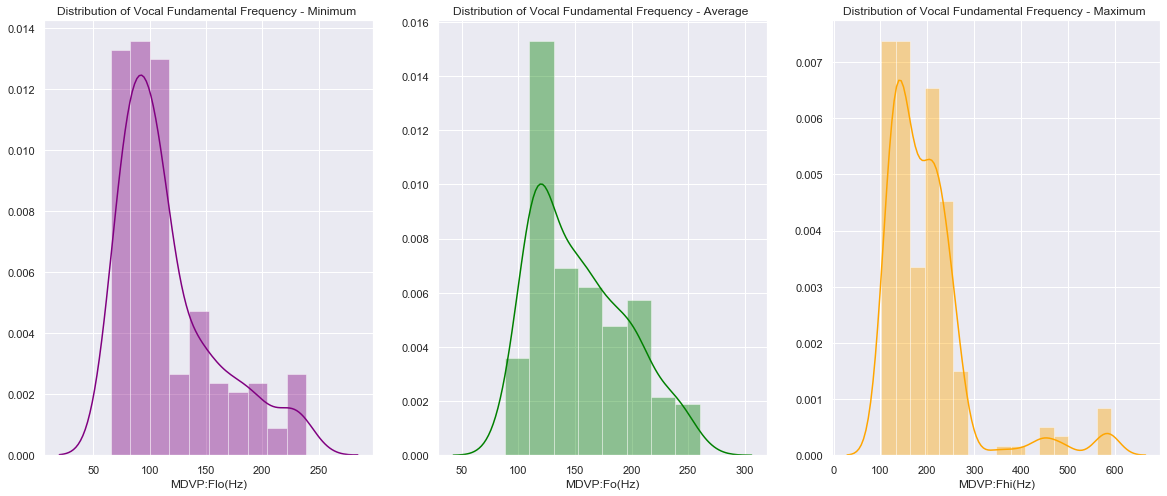

In [10]:
plt.figure(figsize=(20,8))

# subplot 1
plt.subplot(1, 3, 1)
plt.title('Distribution of Vocal Fundamental Frequency - Minimum ')
sns.distplot(parkinson_df['MDVP:Flo(Hz)'],color='purple')

# subplot 2
plt.subplot(1, 3, 2)
plt.title('Distribution of Vocal Fundamental Frequency - Average ')
sns.distplot(parkinson_df['MDVP:Fo(Hz)'],color='green')

# subplot 3
plt.subplot(1, 3, 3)
plt.title('Distribution of Vocal Fundamental Frequency - Maximum ')
sns.distplot(parkinson_df['MDVP:Fhi(Hz)'],color='orange')

plt.show()

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>Mimimum Vocal Fundamental Frequency is positively skewed (marginal) with high values between 75Hz and 125Hz</li>
<li>Average Vocal Fundamental Frequency is almost normally distributed with more high values between 115Hz and 130Hz</li>
<li>Maximum Vocal Fundamental Frequency, no skewness present. There are some values at right side of tail</li>
</ul>
</font>

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Distribution of Variation Fundamental Frequency :
<font color=darkblue>
</font>

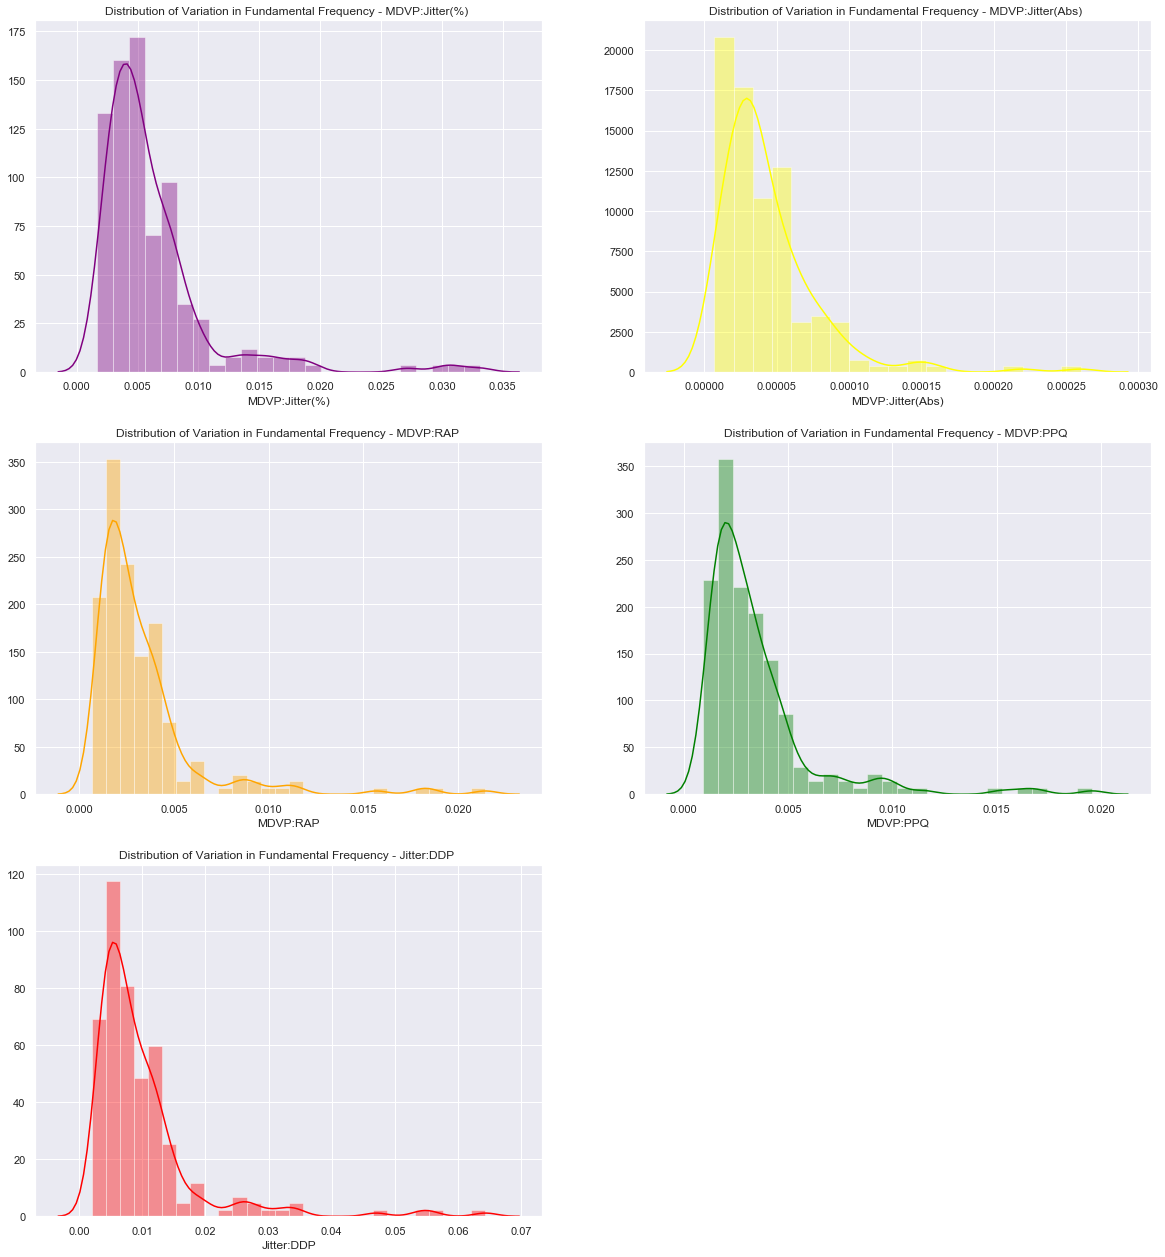

In [11]:
plt.figure(figsize=(20,22))

# subplot 1
plt.subplot(3, 2, 1)
plt.title('Distribution of Variation in Fundamental Frequency - MDVP:Jitter(%) ')
sns.distplot(parkinson_df['MDVP:Jitter(%)'],color='purple')

# subplot 2
plt.subplot(3, 2, 2)
plt.title('Distribution of Variation in Fundamental Frequency - MDVP:Jitter(Abs) ')
sns.distplot(parkinson_df['MDVP:Jitter(Abs)'],color='yellow')

# subplot 3
plt.subplot(3, 2, 3)
plt.title('Distribution of Variation in Fundamental Frequency - MDVP:RAP ')
sns.distplot(parkinson_df['MDVP:RAP'],color='orange')

# subplot 4
plt.subplot(3, 2, 4)
plt.title('Distribution of Variation in Fundamental Frequency - MDVP:PPQ ')
sns.distplot(parkinson_df['MDVP:PPQ'],color='green')

# subplot 5
plt.subplot(3, 2, 5)
plt.title('Distribution of Variation in Fundamental Frequency - Jitter:DDP ')
sns.distplot(parkinson_df['Jitter:DDP'],color='red')

plt.show()

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>All the five Measures of Variation Fundamental Frequency is positively skewed</li>
</ul>
</font>

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Distribution of Variation in Amplitude :
<font color=darkblue>
</font>

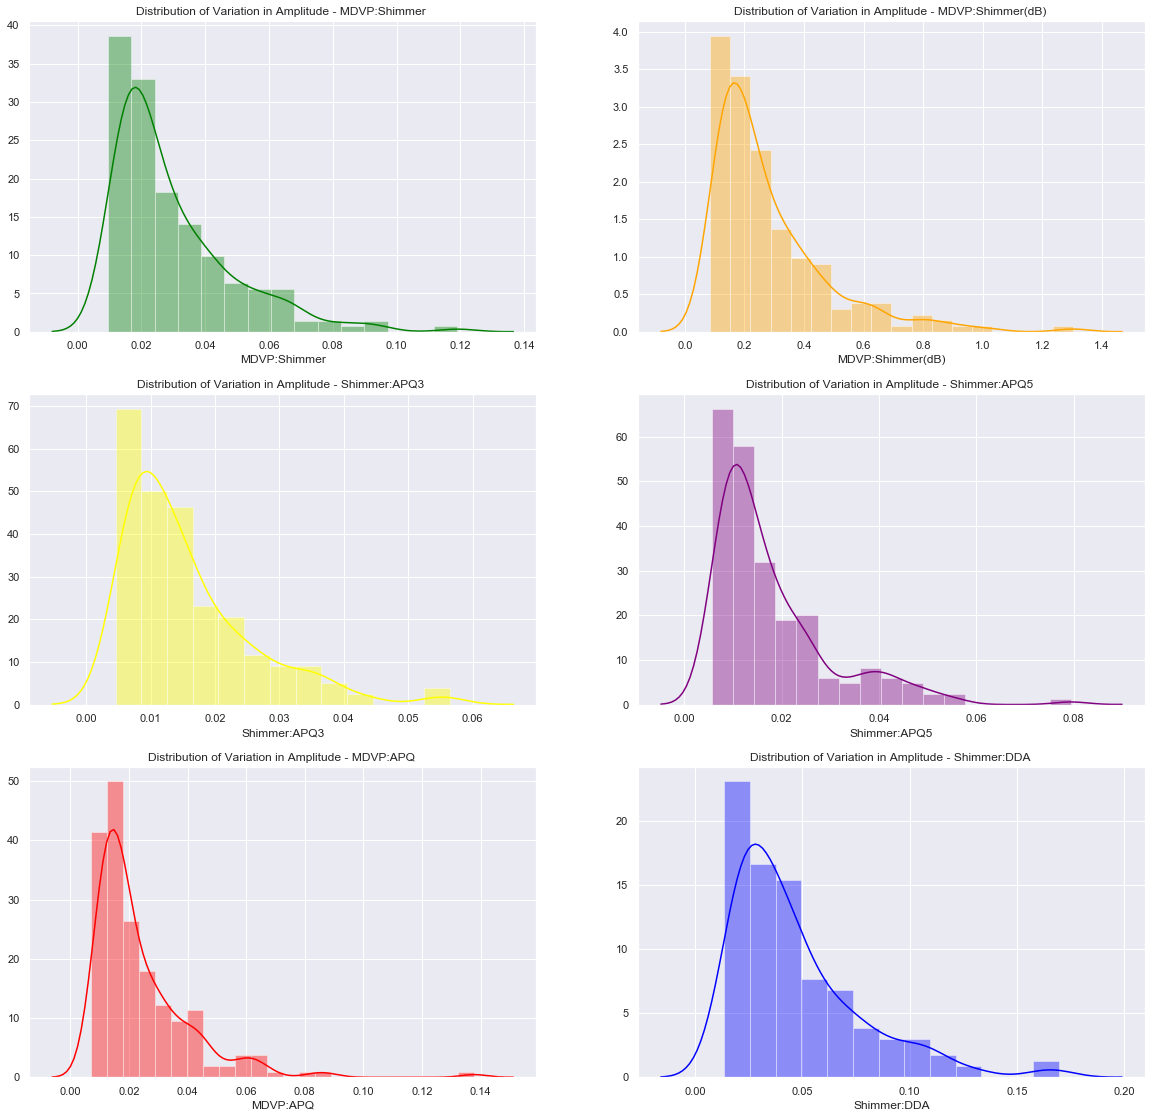

In [12]:
plt.figure(figsize=(20,40))

# subplot 1
plt.subplot(6, 2, 1)
plt.title('Distribution of Variation in Amplitude - MDVP:Shimmer ')
sns.distplot(parkinson_df['MDVP:Shimmer'],color='green')

# subplot 2
plt.subplot(6, 2, 2)
plt.title('Distribution of Variation in Amplitude - MDVP:Shimmer(dB) ')
sns.distplot(parkinson_df['MDVP:Shimmer(dB)'],color='orange')

# subplot 3
plt.subplot(6, 2, 3)
plt.title('Distribution of Variation in Amplitude - Shimmer:APQ3 ')
sns.distplot(parkinson_df['Shimmer:APQ3'],color='yellow')

# subplot 4
plt.subplot(6, 2, 4)
plt.title('Distribution of Variation in Amplitude - Shimmer:APQ5 ')
sns.distplot(parkinson_df['Shimmer:APQ5'],color='purple')

# subplot 5
plt.subplot(6, 2, 5)
plt.title('Distribution of Variation in Amplitude - MDVP:APQ ')
sns.distplot(parkinson_df['MDVP:APQ'],color='red')

# subplot 6
plt.subplot(6, 2, 6)
plt.title('Distribution of Variation in Amplitude - Shimmer:DDA ')
sns.distplot(parkinson_df['Shimmer:DDA'],color='blue')

plt.show()

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>All the six Measures of Variation in Amplitude is positively skewed</li>
</ul>
</font>

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Distribution of Ratio of Noise to Tonal Components in the Voice :
<font color=darkblue>
</font>

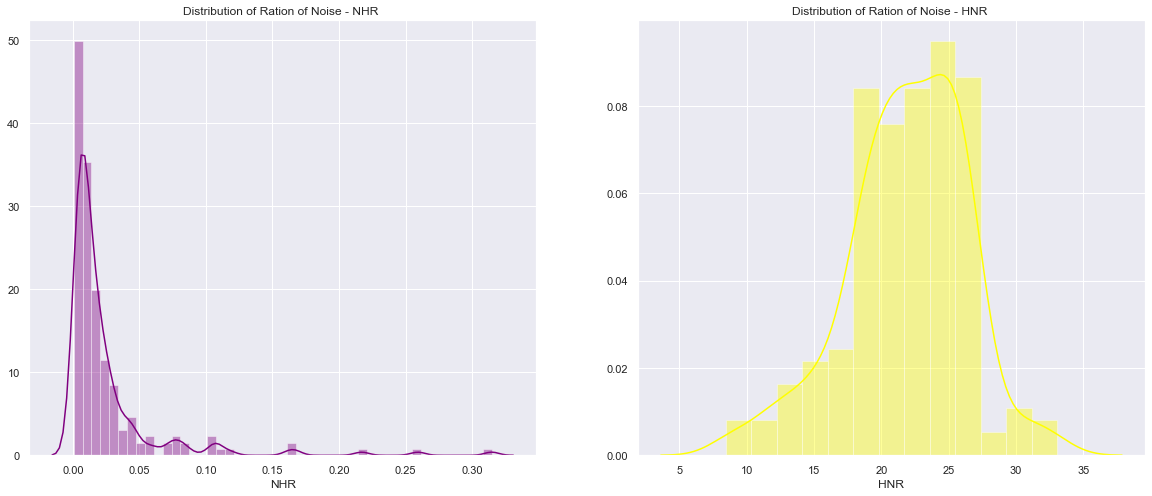

In [13]:
plt.figure(figsize=(20,8))

# subplot 1
plt.subplot(1, 2, 1)
plt.title('Distribution of Ration of Noise - NHR ')
sns.distplot(parkinson_df['NHR'],color='purple')

# subplot 2
plt.subplot(1, 2, 2)
plt.title('Distribution of Ration of Noise - HNR ')
sns.distplot(parkinson_df['HNR'],color='yellow')

plt.show()

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>Ratio of Noise to Total Components in the voice - NPR is positively skewed</li>
<li>Ratio of Noise to Total Components in the voice - HNR is marginally skewed on left side</li>
</ul>
</font>

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Distribution of Nonlinear Measures of Dynamical Complexity :
<font color=darkblue>
</font>

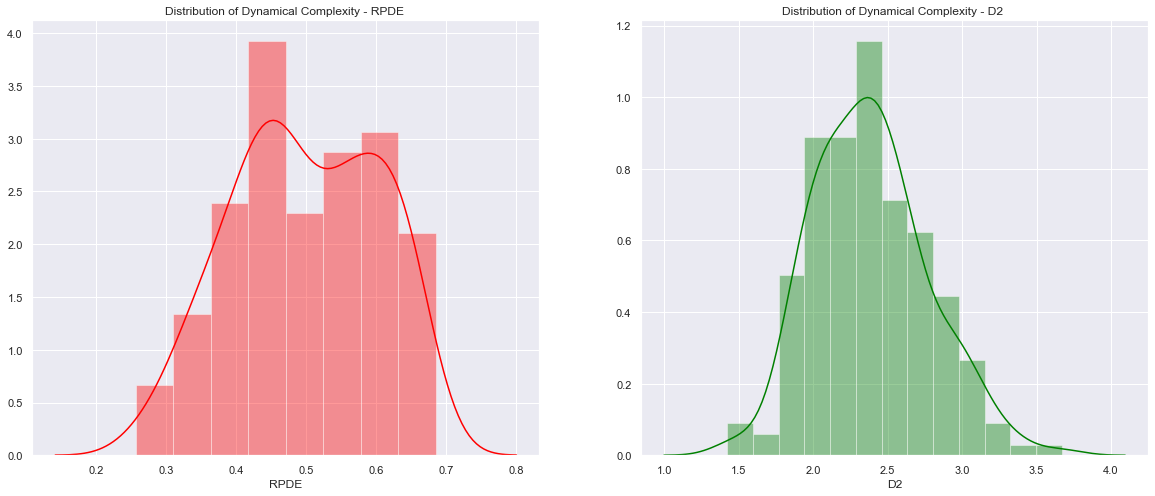

In [14]:
plt.figure(figsize=(20,8))

# subplot 1
plt.subplot(1, 2, 1)
plt.title('Distribution of Dynamical Complexity - RPDE ')
sns.distplot(parkinson_df['RPDE'],color='red')

# subplot 2
plt.subplot(1, 2, 2)
plt.title('Distribution of Dynamical Complexity - D2 ')
sns.distplot(parkinson_df['D2'],color='green')

plt.show()

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>Nonlinear Measures of Dynamical Complexity is Normally Distributed</li>
</ul>
</font>

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Distribution of Nonlinear Measures of Fundamental Frequency Variation :
<font color=darkblue>
</font>

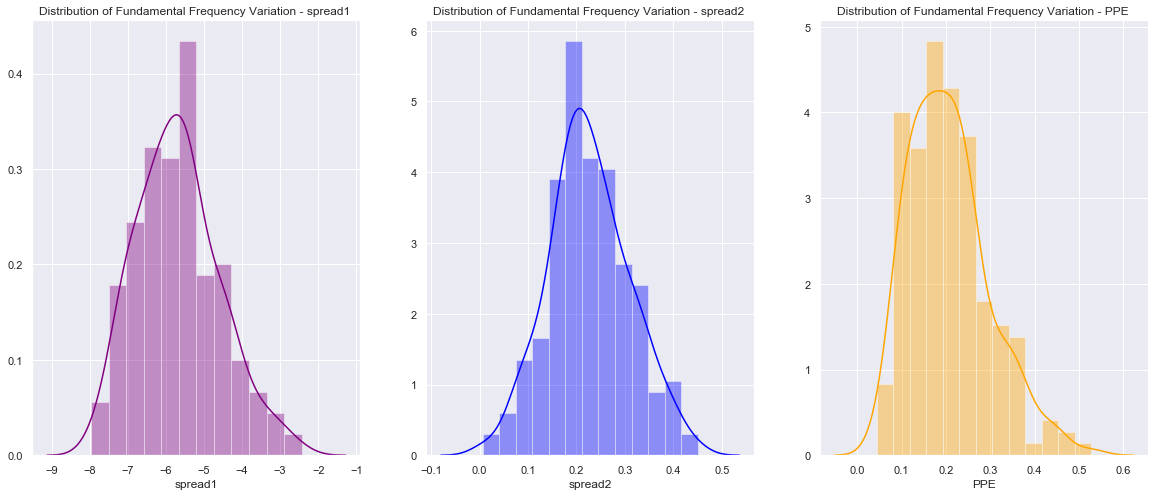

In [15]:
plt.figure(figsize=(20,8))

# subplot 1
plt.subplot(1, 3, 1)
plt.title('Distribution of Fundamental Frequency Variation - spread1 ')
sns.distplot(parkinson_df['spread1'],color='purple')

# subplot 2
plt.subplot(1, 3, 2)
plt.title('Distribution of Fundamental Frequency Variation - spread2 ')
sns.distplot(parkinson_df['spread2'],color='blue')

# subplot 3
plt.subplot(1, 3, 3)
plt.title('Distribution of Fundamental Frequency Variation - PPE ')
sns.distplot(parkinson_df['PPE'],color='orange')

plt.show()

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>All Nonlinear Measures of Fundamental Frequency Variation is Normally Distributed</li>
</ul>
</font>

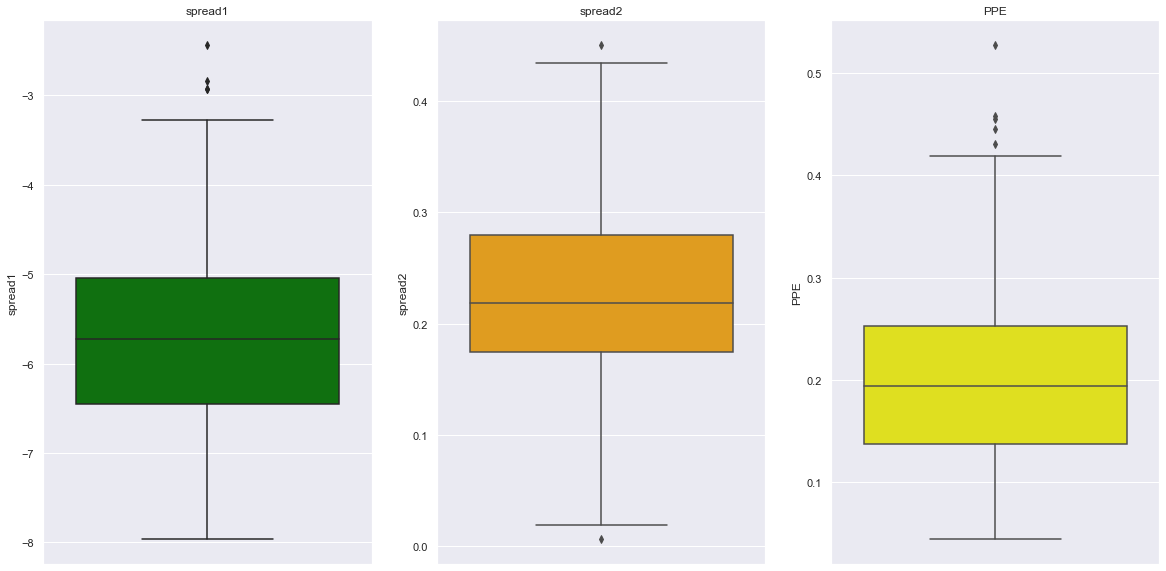

In [16]:
plt.figure(figsize=(20,10))

# subplot 1
plt.subplot(1, 3, 1)
plt.title('spread1')
sns.boxplot(parkinson_df['spread1'],orient='vertical',color='green')

# subplot 2
plt.subplot(1, 3, 2)
plt.title('spread2')
sns.boxplot(parkinson_df['spread2'],orient='vertical',color='orange')

# subplot 3
plt.subplot(1, 3, 3)
plt.title('PPE')
sns.boxplot(parkinson_df['PPE'],orient='vertical',color='yellow')

plt.show()

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>Outliers present in all Nonlinear Measures of Fundamental Frequency Variation</li>
</ul>
</font>

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Skewness Check :
<font color=darkblue>
</font>

In [17]:
Skewness = pd.DataFrame({'Skewness' : [stats.skew(parkinson_df['MDVP:Fo(Hz)']),stats.skew(parkinson_df['MDVP:Fhi(Hz)']),
                                       stats.skew(parkinson_df['MDVP:Flo(Hz)']),stats.skew(parkinson_df['MDVP:Jitter(%)']),
                                       stats.skew(parkinson_df['MDVP:Jitter(Abs)']),stats.skew(parkinson_df['MDVP:RAP']),
                                       stats.skew(parkinson_df['MDVP:PPQ']),stats.skew(parkinson_df['Jitter:DDP']),
                                       stats.skew(parkinson_df['MDVP:Shimmer']),stats.skew(parkinson_df['MDVP:Shimmer(dB)']),
                                       stats.skew(parkinson_df['Shimmer:APQ3']),stats.skew(parkinson_df['Shimmer:APQ5']),
                                       stats.skew(parkinson_df['MDVP:APQ']),stats.skew(parkinson_df['Shimmer:DDA']),
                                       stats.skew(parkinson_df['NHR']),stats.skew(parkinson_df['HNR']),
                                       stats.skew(parkinson_df['RPDE']),stats.skew(parkinson_df['D2']),
                                       stats.skew(parkinson_df['spread1']),stats.skew(parkinson_df['spread2']),
                                       stats.skew(parkinson_df['PPE'])]}, 
                        index=['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 
                               'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 
                               'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'D2', 'spread1', 
                               'spread2', 'PPE'])

Skewness

Skewness
MDVP:Fo(Hz)       0.587176
MDVP:Fhi(Hz)      2.522549
MDVP:Flo(Hz)      1.207966
MDVP:Jitter(%)    3.061165
MDVP:Jitter(Abs)  2.628650
MDVP:RAP          3.334801
MDVP:PPQ          3.050196
Jitter:DDP        3.336141
MDVP:Shimmer      1.653634
MDVP:Shimmer(dB)  1.983976
Shimmer:APQ3      1.568392
Shimmer:APQ5      1.784831
MDVP:APQ          2.597864
Shimmer:DDA       1.568433
NHR               4.188173
HNR              -0.510353
RPDE             -0.142297
D2                0.427066
spread1           0.428808
spread2           0.143317
PPE               0.791343

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>Maximum and Minimum measures of Vocal Fundamental Frequency has skewness</li>
<li>All the five Measures of Variation Fundamental Frequency is positively skewed</li>
<li>All the six Measures of Variation in Amplitude is positively skewed</li>
<li>Measures of Ratio of Noise to Total Components in the voice, NPR is positively skewed while HNR is marginally skewed</li>
<li>No skewness in Nonlinear Measures of Dynamical Complexity</li>
<li>No Skewness in Nonlinear Measures of Fundamental Frequency Variation</li>
</ul>
</font>

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Biivariate Analysis :
<font color=darkblue>
</font>

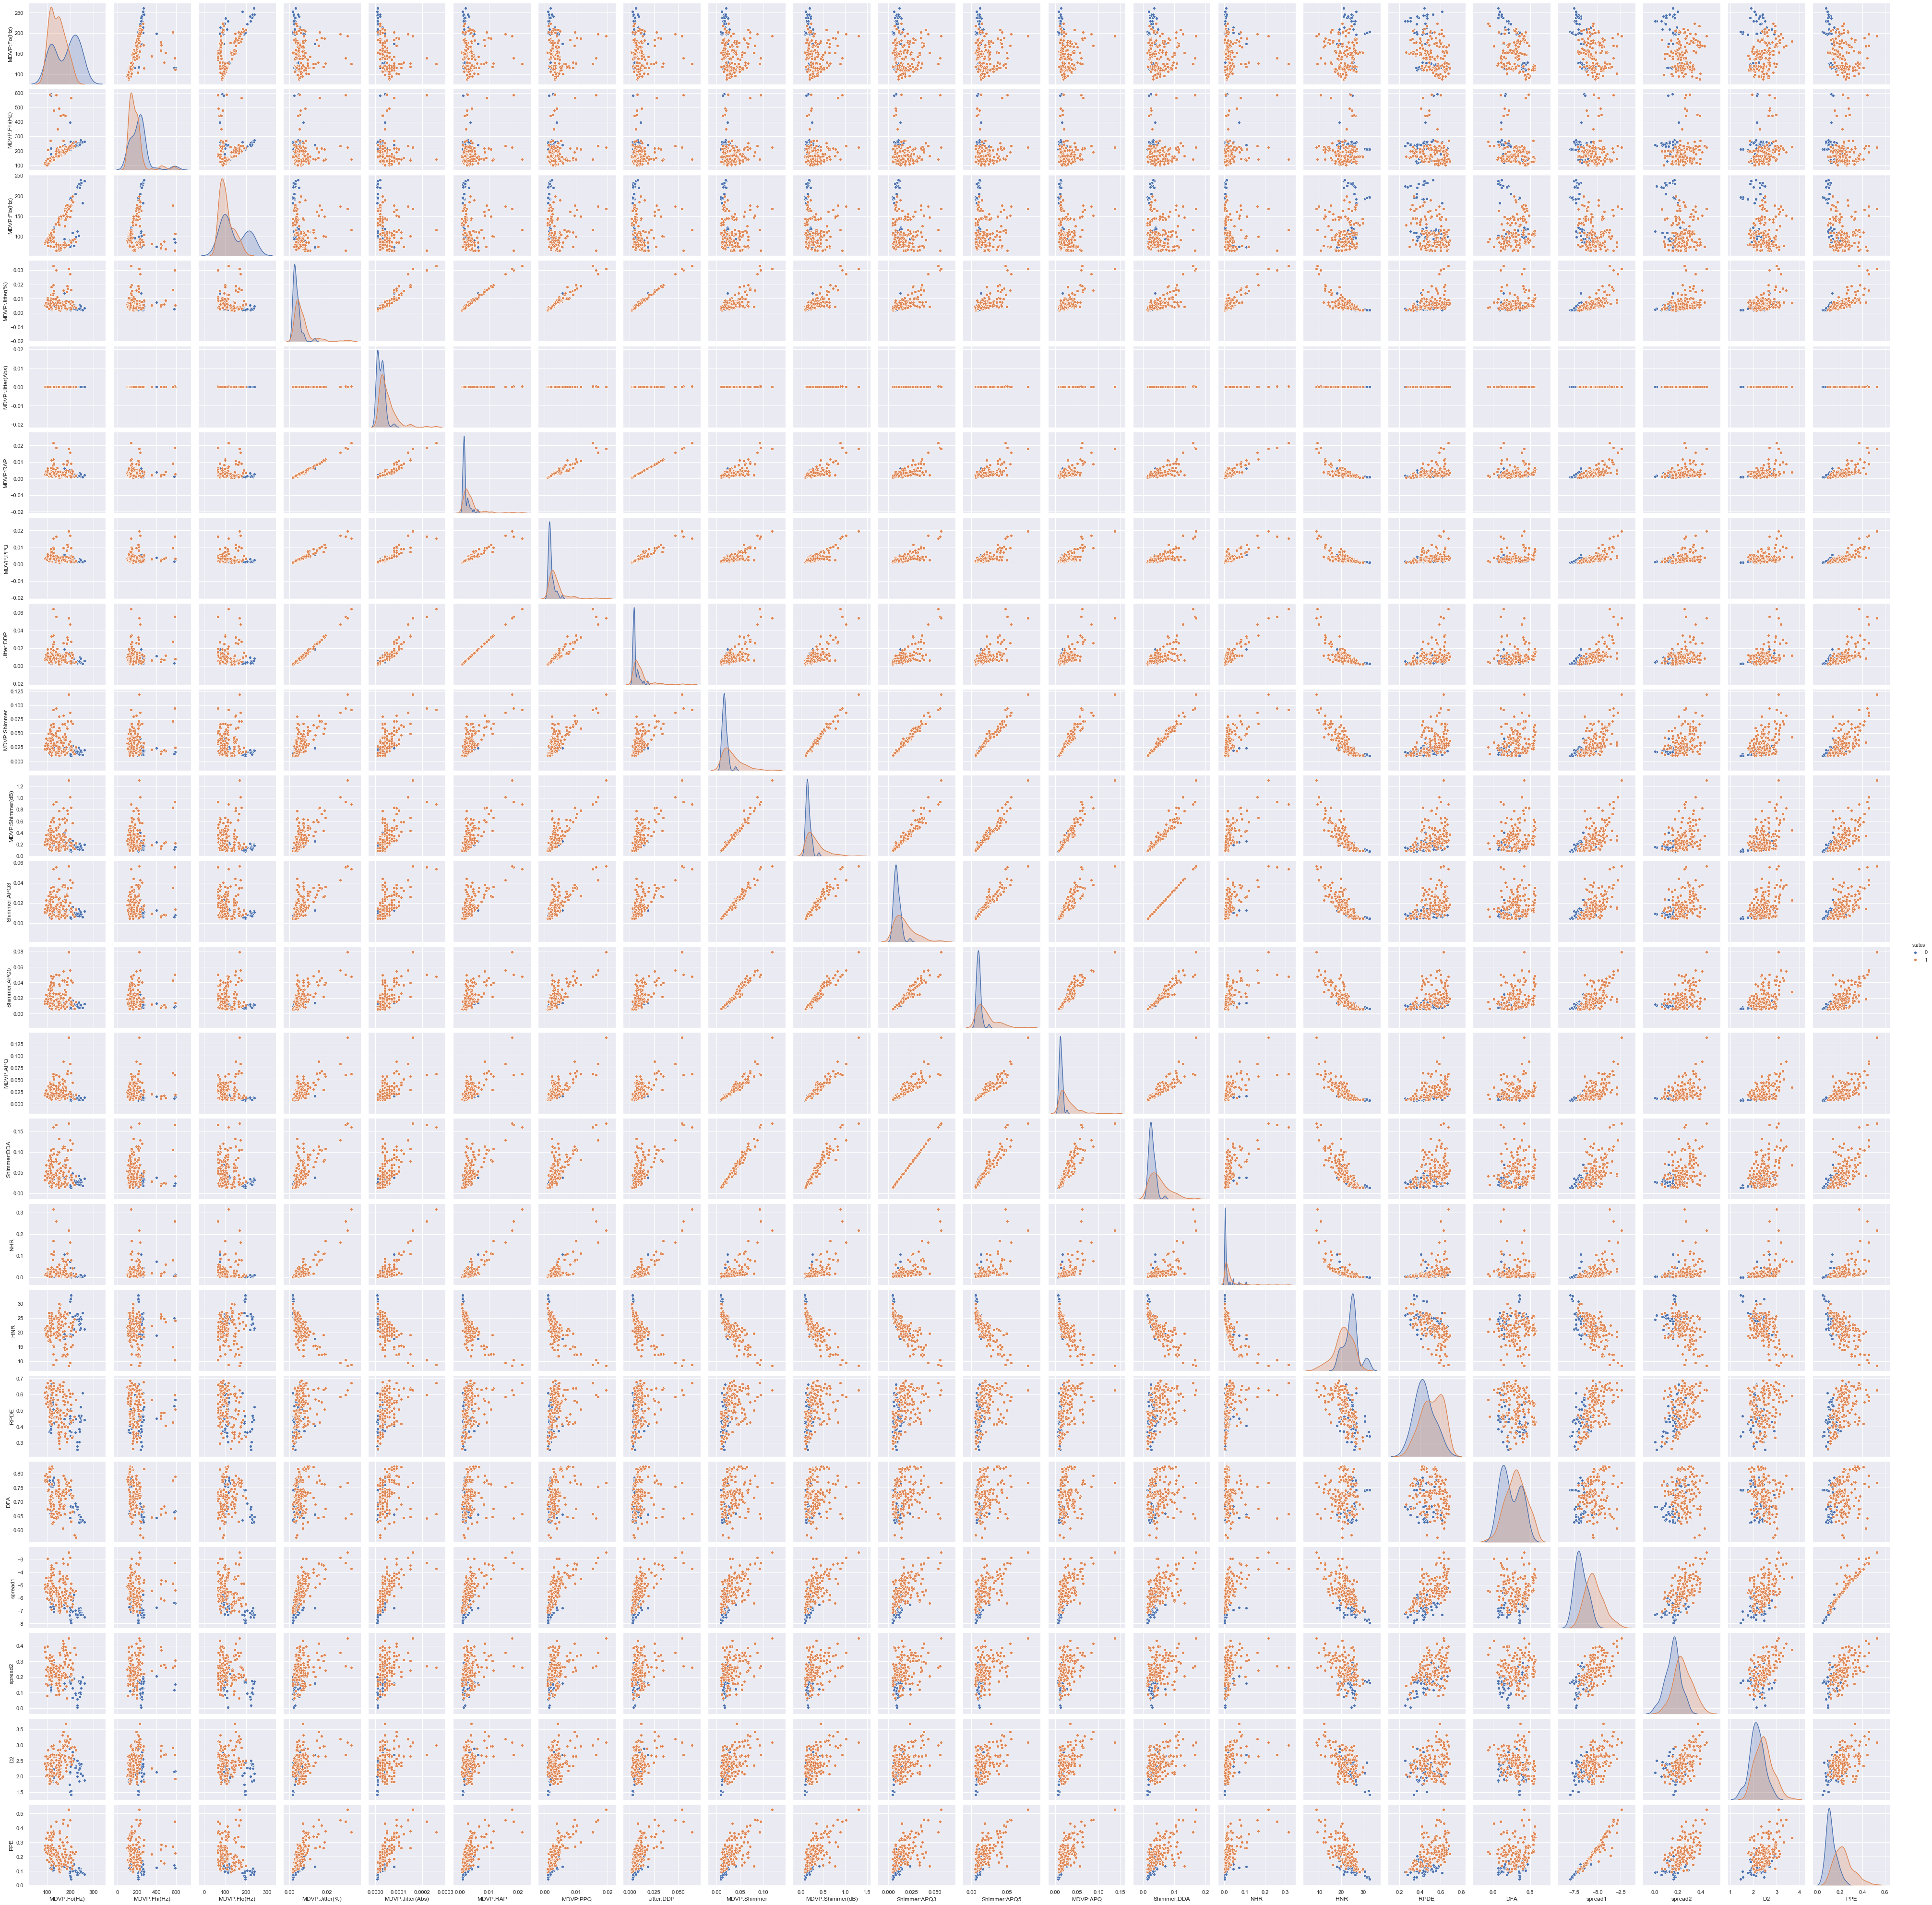

In [18]:
sns.pairplot(parkinson_df, hue='status', diag_kind='kde')

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Analysis on Target Variable :
<font color=darkblue>
</font>

In [19]:
parkinson_df['status'].value_counts().to_frame()

status
1     147
0      48

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
Of Total 195 rows, 48 rows labelled as 0 and 147 rows labelled as 1, which indicates 147 perople have Parkinson Disease 
</font>

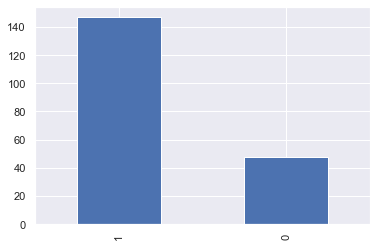

In [20]:
pd.value_counts(parkinson_df['status']).plot(kind="bar")

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
Of Total 195 rows, 48 rows labelled as 0 and 147 rows labelled as 1, which indicates 147 people have Parkinson Disease
</font>

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Influence of Independent Variables on Target Variable :
<font color=darkblue>
</font>

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Nonlinear Measures of Fundamental Frequency Variation :
<font color=darkblue>
</font>

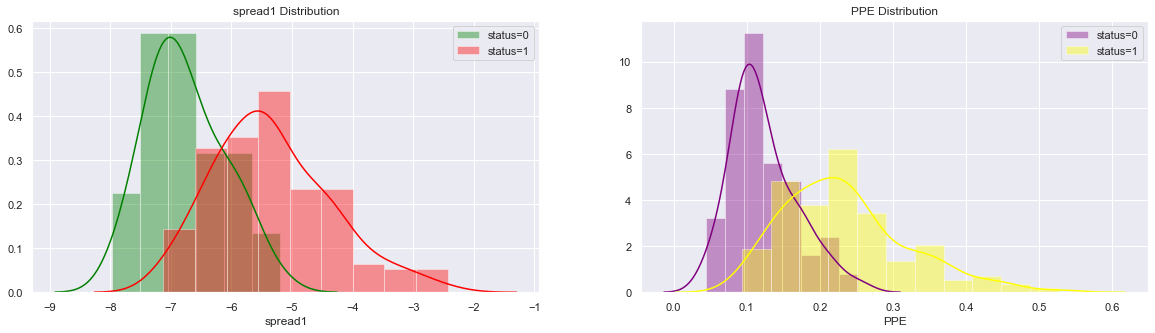

In [21]:
plt.figure(figsize=(20,5))

# subplot 1
plt.subplot(1, 2, 1)
sns.distplot(parkinson_df[parkinson_df["status"] == 0]['spread1'], label='status=0', color='green')
sns.distplot(parkinson_df[parkinson_df["status"] == 1]['spread1'], label='status=1', color='red')
plt.legend()
plt.title("spread1 Distribution")

# subplot 2
plt.subplot(1, 2, 2)
sns.distplot(parkinson_df[parkinson_df["status"] == 0]['PPE'], label='status=0', color='purple')
sns.distplot(parkinson_df[parkinson_df["status"] == 1]['PPE'], label='status=1', color='yellow')
plt.legend()
plt.title("PPE Distribution")

plt.show()

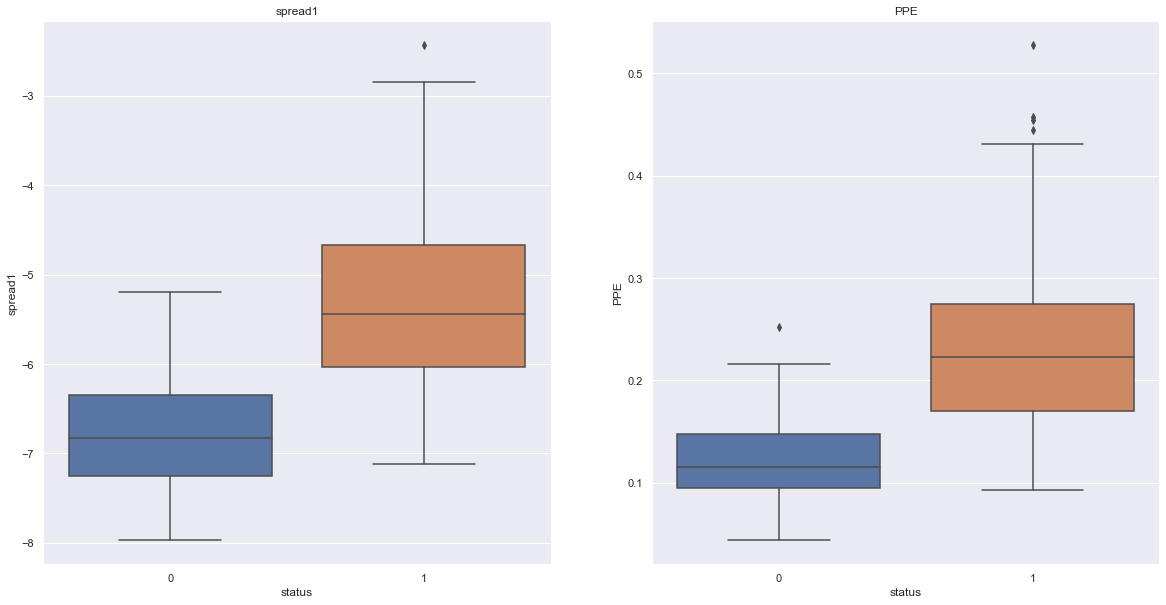

In [22]:
plt.figure(figsize=(20,10))

# subplot 1
plt.subplot(1, 2, 1)
plt.title('spread1')
sns.boxplot(x=parkinson_df['status'], y=parkinson_df['spread1'], orient='vertical')

# subplot 2
plt.subplot(1, 2, 2)
plt.title('PPE')
sns.boxplot(x=parkinson_df['status'], y=parkinson_df['PPE'], orient='vertical')

plt.show()

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>People with Parkinson Disease have more spread1</li>
<li>People with Parkinson Disease have more PPE</li>
</ul>
</font>

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Measures of Ratio of Noise to Tonal components in the voice :
<font color=darkblue>
</font>

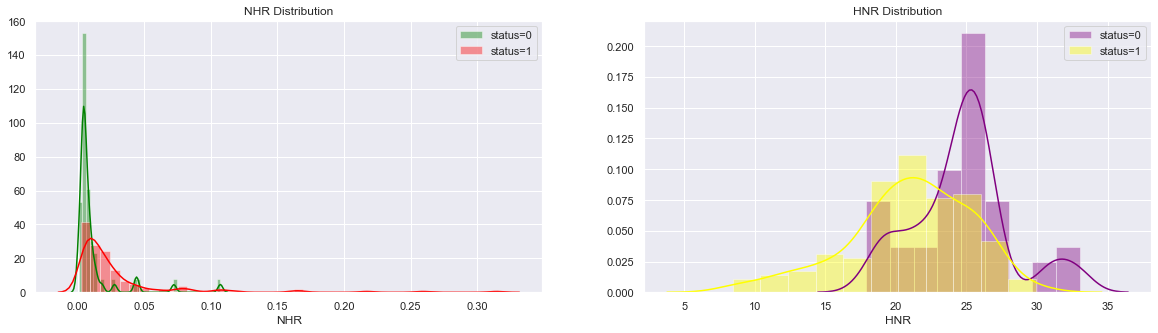

In [23]:
plt.figure(figsize=(20,5))

# subplot 1
plt.subplot(1, 2, 1)
sns.distplot(parkinson_df[parkinson_df["status"] == 0]['NHR'], label='status=0', color='green')
sns.distplot(parkinson_df[parkinson_df["status"] == 1]['NHR'], label='status=1', color='red')
plt.legend()
plt.title("NHR Distribution")

# subplot 2
plt.subplot(1, 2, 2)
sns.distplot(parkinson_df[parkinson_df["status"] == 0]['HNR'], label='status=0', color='purple')
sns.distplot(parkinson_df[parkinson_df["status"] == 1]['HNR'], label='status=1', color='yellow')
plt.legend()
plt.title("HNR Distribution")

plt.show()

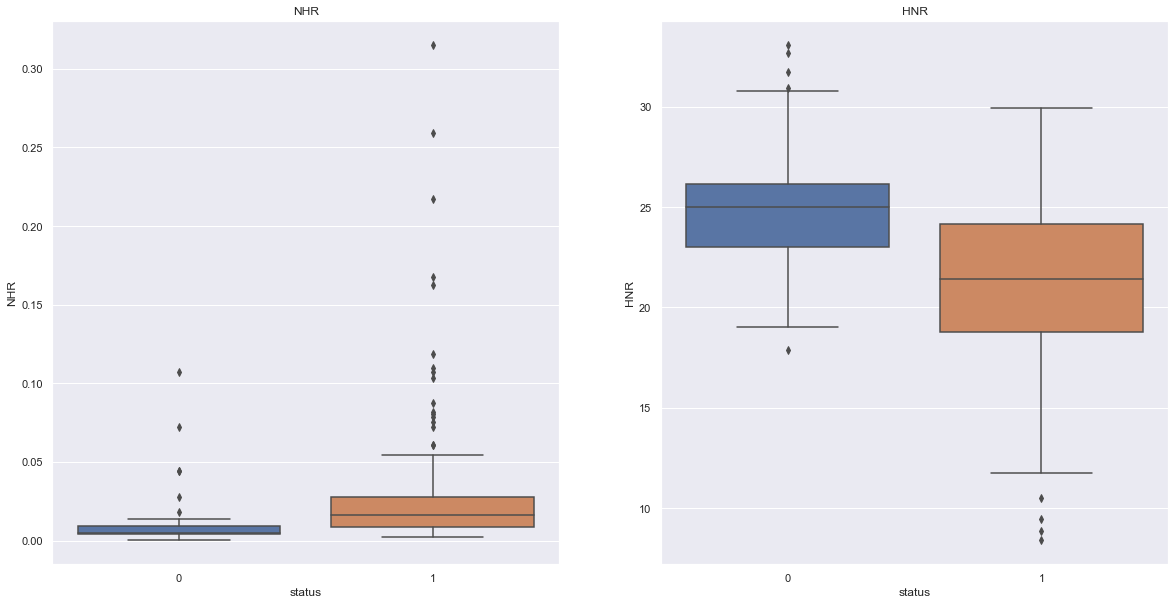

In [24]:
plt.figure(figsize=(20,10))

# subplot 1
plt.subplot(1, 2, 1)
plt.title('NHR')
sns.boxplot(x=parkinson_df['status'], y=parkinson_df['NHR'], orient='vertical')

# subplot 2
plt.subplot(1, 2, 2)
plt.title('HNR')
sns.boxplot(x=parkinson_df['status'], y=parkinson_df['HNR'], orient='vertical')

plt.show()

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>People with Parkinson Disease have high level of NHR</li>
<li>People with Parkinson Disease have low HNR</li>
</ul>
</font>

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Measures of Vocal Fundamental Frequency :
<font color=darkblue>
</font>

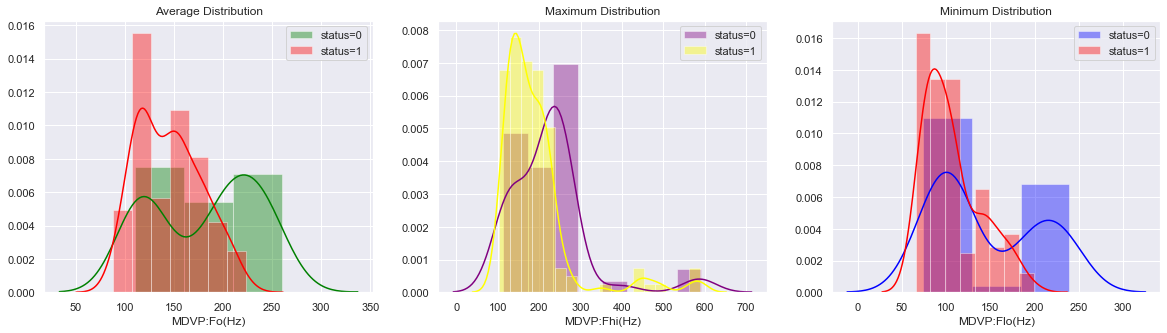

In [25]:
plt.figure(figsize=(20,5))

# subplot 1
plt.subplot(1, 3, 1)
sns.distplot(parkinson_df[parkinson_df["status"] == 0]['MDVP:Fo(Hz)'], label='status=0', color='green')
sns.distplot(parkinson_df[parkinson_df["status"] == 1]['MDVP:Fo(Hz)'], label='status=1', color='red')
plt.legend()
plt.title("Average Distribution")

# subplot 2
plt.subplot(1, 3, 2)
sns.distplot(parkinson_df[parkinson_df["status"] == 0]['MDVP:Fhi(Hz)'], label='status=0', color='purple')
sns.distplot(parkinson_df[parkinson_df["status"] == 1]['MDVP:Fhi(Hz)'], label='status=1', color='yellow')
plt.legend()
plt.title("Maximum Distribution")

# subplot 3
plt.subplot(1, 3, 3)
sns.distplot(parkinson_df[parkinson_df["status"] == 0]['MDVP:Flo(Hz)'], label='status=0', color='blue')
sns.distplot(parkinson_df[parkinson_df["status"] == 1]['MDVP:Flo(Hz)'], label='status=1', color='red')
plt.legend()
plt.title("Minimum Distribution")

plt.show()

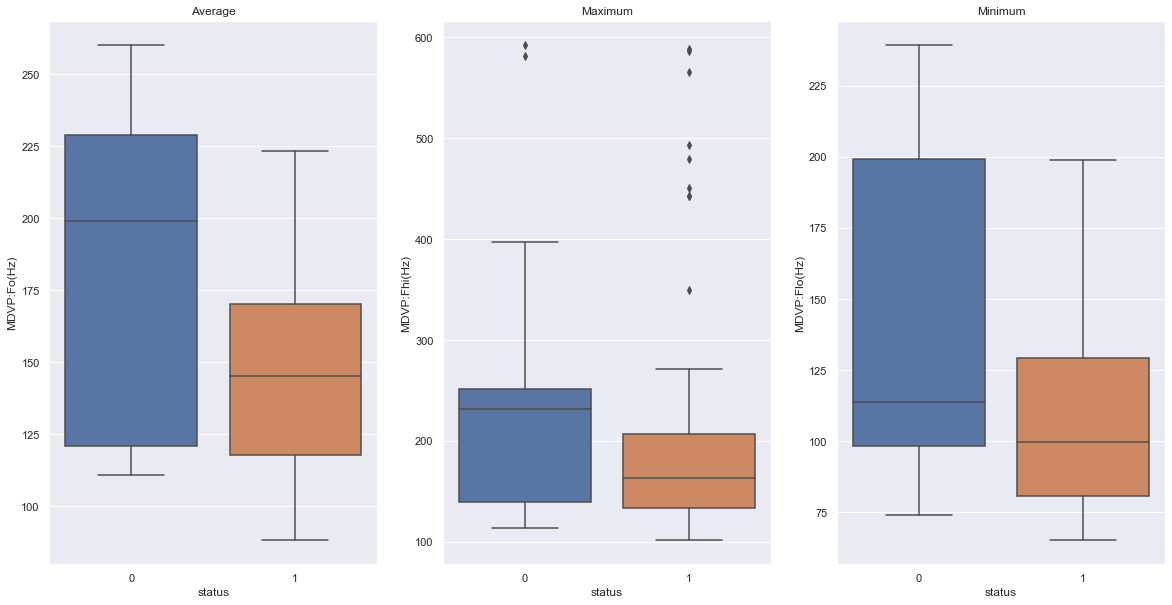

In [26]:
plt.figure(figsize=(20,10))

# subplot 1
plt.subplot(1, 3, 1)
plt.title('Average')
sns.boxplot(x=parkinson_df['status'], y=parkinson_df['MDVP:Fo(Hz)'], orient='vertical')

# subplot 2
plt.subplot(1, 3, 2)
plt.title('Maximum')
sns.boxplot(x=parkinson_df['status'], y=parkinson_df['MDVP:Fhi(Hz)'], orient='vertical')

# subplot 3
plt.subplot(1, 3, 3)
plt.title('Minimum')
sns.boxplot(x=parkinson_df['status'], y=parkinson_df['MDVP:Flo(Hz)'], orient='vertical')

plt.show()

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>People with Parkinson Disease have Average Vocal Fundamental Frequency between 120Hz and 170Hz</li>
<li>People with Parkinson Disease have Maximum Vocal Fundamental Frequency between 115Hz and 225Hz</li>
<li>People with Parkinson Disease have Minimum Vocal Fundamental Frequency between 80Hz and 130Hz</li>
</ul>
</font>

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Measures of Variation in Fundamental Frequency :
<font color=darkblue>
</font>

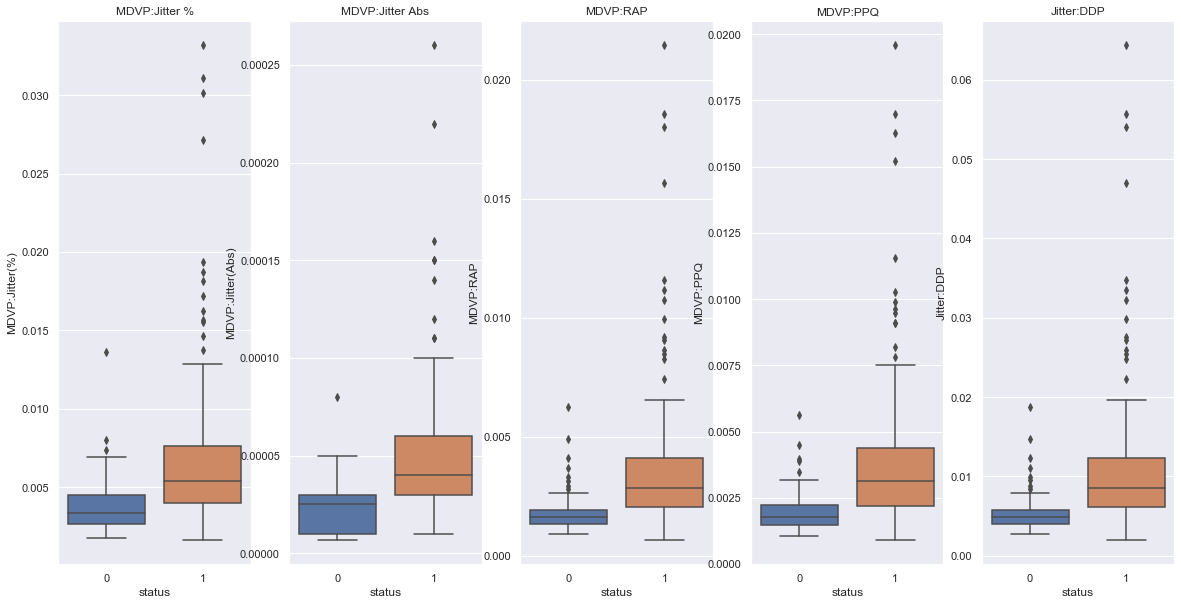

In [27]:
plt.figure(figsize=(20,10))

# subplot 1
plt.subplot(1, 5, 1)
plt.title('MDVP:Jitter %')
sns.boxplot(x=parkinson_df['status'], y=parkinson_df['MDVP:Jitter(%)'], orient='vertical')

# subplot 2
plt.subplot(1, 5, 2)
plt.title('MDVP:Jitter Abs')
sns.boxplot(x=parkinson_df['status'], y=parkinson_df['MDVP:Jitter(Abs)'], orient='vertical')

# subplot 3
plt.subplot(1, 5, 3)
plt.title('MDVP:RAP')
sns.boxplot(x=parkinson_df['status'], y=parkinson_df['MDVP:RAP'], orient='vertical')

# subplot 4
plt.subplot(1, 5, 4)
plt.title('MDVP:PPQ')
sns.boxplot(x=parkinson_df['status'], y=parkinson_df['MDVP:PPQ'], orient='vertical')

# subplot 5
plt.subplot(1, 5, 5)
plt.title('Jitter:DDP')
sns.boxplot(x=parkinson_df['status'], y=parkinson_df['Jitter:DDP'], orient='vertical')

plt.show()

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>People with Parkinson Disease have higher measure of MDVP - Jitter(%)</li>
</ul>
</font>

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Correlation Check :
<font color=darkblue>
</font>

In [28]:
parkinson_df.corr()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
MDVP:Fo(Hz)          1.000000      0.400985      0.596546       -0.118003   
MDVP:Fhi(Hz)         0.400985      1.000000      0.084951        0.102086   
MDVP:Flo(Hz)         0.596546      0.084951      1.000000       -0.139919   
MDVP:Jitter(%)      -0.118003      0.102086     -0.139919        1.000000   
MDVP:Jitter(Abs)    -0.382027     -0.029198     -0.277815        0.935714   
MDVP:RAP            -0.076194      0.097177     -0.100519        0.990276   
MDVP:PPQ            -0.112165      0.091126     -0.095828        0.974256   
Jitter:DDP          -0.076213      0.097150     -0.100488        0.990276   
MDVP:Shimmer        -0.098374      0.002281     -0.144543        0.769063   
MDVP:Shimmer(dB)    -0.073742      0.043465     -0.119089        0.804289   
Shimmer:APQ3        -0.094717     -0.003743     -0.150747        0.746625   
Shimmer:APQ5        -0.070682     -0.009997     -0.101095        0.725561   
MDVP:APQ            -0.077774      0.004937     -0.107293        0.758255   
Shimmer:DDA         -0.094732     -0.003733     -0.150737        0.746635   
NHR                 -0.021981      0.163766     -0.108670        0.906959   
HNR                  0.059144     -0.024893      0.210851       -0.728165   
status              -0.383535     -0.166136     -0.380200        0.278220   
RPDE                -0.383894     -0.112404     -0.400143        0.360673   
DFA                 -0.446013     -0.343097     -0.050406        0.098572   
spread1             -0.413738     -0.076658     -0.394857        0.693577   
spread2             -0.249450     -0.002954     -0.243829        0.385123   
D2                   0.177980      0.176323     -0.100629        0.433434   
PPE                 -0.372356     -0.069543     -0.340071        0.721543   

                  MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  \
MDVP:Fo(Hz)              -0.382027 -0.076194 -0.112165   -0.076213   
MDVP:Fhi(Hz)             -0.029198  0.097177  0.091126    0.097150   
MDVP:Flo(Hz)             -0.277815 -0.100519 -0.095828   -0.100488   
MDVP:Jitter(%)            0.935714  0.990276  0.974256    0.990276   
MDVP:Jitter(Abs)          1.000000  0.922911  0.897778    0.922913   
MDVP:RAP                  0.922911  1.000000  0.957317    1.000000   
MDVP:PPQ                  0.897778  0.957317  1.000000    0.957319   
Jitter:DDP                0.922913  1.000000  0.957319    1.000000   
MDVP:Shimmer              0.703322  0.759581  0.797826    0.759555   
MDVP:Shimmer(dB)          0.716601  0.790652  0.839239    0.790621   
Shimmer:APQ3              0.697153  0.744912  0.763580    0.744894   
Shimmer:APQ5              0.648961  0.709927  0.786780    0.709907   
MDVP:APQ                  0.648793  0.737455  0.804139    0.737439   
Shimmer:DDA               0.697170  0.744919  0.763592    0.744901   
NHR                       0.834972  0.919521  0.844604    0.919548   
HNR                      -0.656810 -0.721543 -0.731510   -0.721494   
status                    0.338653  0.266668  0.288698    0.266646   
RPDE                      0.441839  0.342140  0.333274    0.342079   
DFA                       0.175036  0.064083  0.196301    0.064026   
spread1                   0.735779  0.648328  0.716489    0.648328   
spread2                   0.388543  0.324407  0.407605    0.324377   
D2                        0.310694  0.426605  0.412524    0.426556   
PPE                       0.748162  0.670999  0.769647    0.671005   

                  MDVP:Shimmer  MDVP:Shimmer(dB)  ...  Shimmer:DDA       NHR  \
MDVP:Fo(Hz)          -0.098374         -0.073742  ...    -0.094732 -0.021981   
MDVP:Fhi(Hz)          0.002281          0.043465  ...    -0.003733  0.163766   
MDVP:Flo(Hz)         -0.144543         -0.119089  ...    -0.150737 -0.108670   
MDVP:Jitter(%)        0.769063          0.804289  ...     0.746635  0.906959   
MDVP:Jitter(Abs)      0.703322          0.716601  ...     0.697170  0.834972   
MDVP:RAP

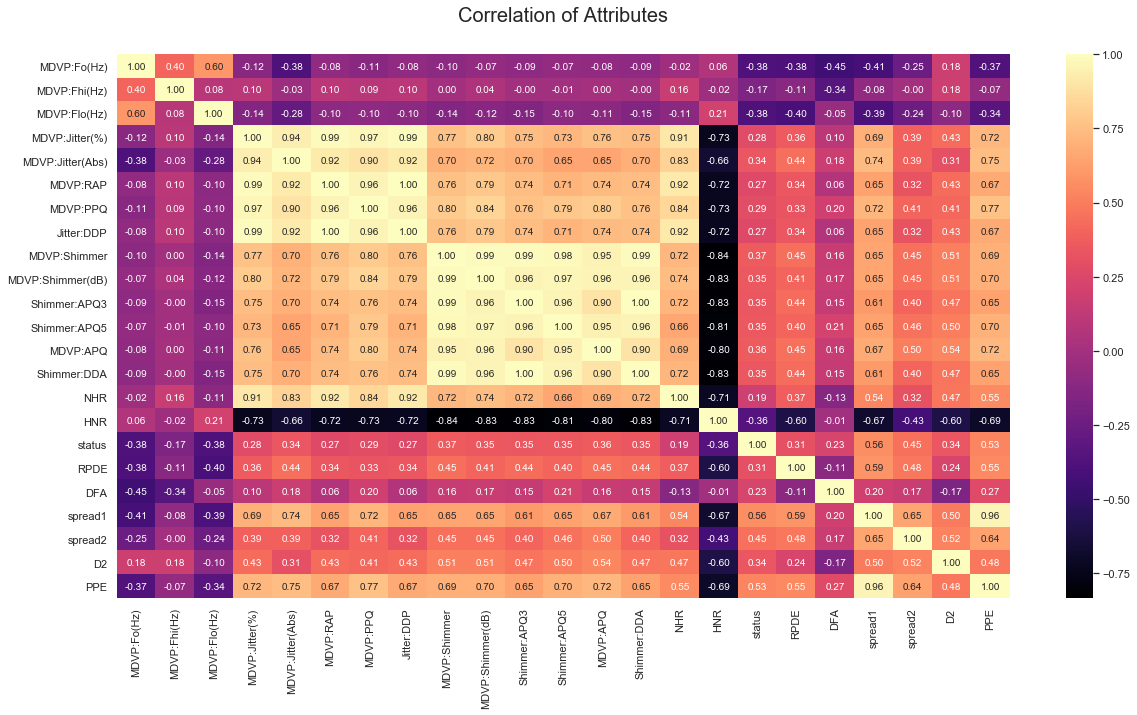

In [29]:
plt.figure(figsize = (20,10))
plt.title('Correlation of Attributes', y=1.05, size=20)
sns.heatmap( parkinson_df.corr(), cmap='magma',annot=True, fmt='.2f')

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>Variation in Fundemental Frequency - MDVP:Jitter(%) has a very high correlation with other measures of Variation in Fundamental Frequency - MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP, could be due to they are related to each other</li>
<li>Variation in Amplitude - MDVP:Shimmer has a very high correlation with other measures of variation in Amplitude - MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ, Shimmer:DDA, could be due to they are related to each other </li>
<li>Nonlinear Measure of fundamental frequency - spread1 is highly correlated with PPE</li>
<li>Target variable status has weak positive correlation with spread1</li>
</ul> 
</font>

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Reduce Dimensions :
<font color=darkblue>
As suggested earlier we will drop name column as it is not much significant
</font>

In [31]:
parkinson_df = parkinson_df.drop(['name'], axis=1)

In [32]:
parkinson_df.shape

(195, 23)

In [33]:
parkinson_df.head(2)

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  \
0      119.992       157.302        74.997         0.00784           0.00007   
1      122.400       148.650       113.819         0.00968           0.00008   

   MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer(dB)  ...  \
0   0.00370   0.00554     0.01109       0.04374             0.426  ...   
1   0.00465   0.00696     0.01394       0.06134             0.626  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   
1      0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192   

    spread2        D2       PPE  
0  0.266482  2.301442  0.284654  
1  0.335590  2.486855  0.368674  

[2 rows x 23 columns]

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Split Data :
<font color=darkblue>
Split dataset into Train and Test Split with 70:30 ratio
</font>

In [34]:
X_Indepenent = parkinson_df.drop(['status'], axis=1)
Y_Target = parkinson_df[['status']]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_Indepenent, Y_Target, test_size=0.3, random_state=1)

In [36]:
print('X train data {}' .format(X_train.shape))
print('X test data {}' .format(X_test.shape))
print('Y train data {}' .format(y_train.shape))
print('Y test data {}' .format(y_test.shape))

X train data (136, 22)
X test data (59, 22)
Y train data (136, 1)
Y test data (59, 1)


#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
Data split into train and test with 70:30 ratio
</font>

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">ROC Curve :
<font color=darkblue>
</font>


ROC-AUC
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.855


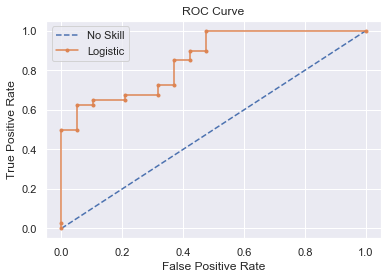

In [40]:
ns_probs = [0 for _ in range(len(y_test))]

model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)

lr_probs = model.predict_proba(X_test)

lr_probs = lr_probs[:, 1]

ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

print('\nROC-AUC')
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Precision-Recall Curve :
<font color=darkblue>
</font>


Precision-Recall
Logistic: f1=0.847 auc=0.930


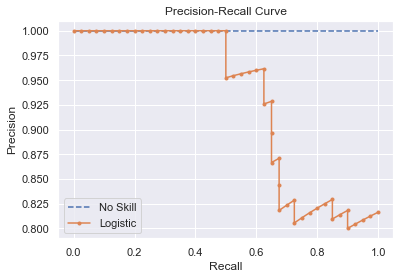

In [42]:
# predict class values
yhat = model.predict(X_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)

print('\nPrecision-Recall')
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))

no_skill = len(y_test[y_test==1]) / len(y_test)

plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')

plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()


### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Prepare Data : Scale Data / Missing Value Cehck
<font color=darkblue>
    <b>Scaling :</b> This is effective in KNN, Principal Component Analysis (PCA), Gradient Descent algorithms. Tree Based, Logistics Regression and Naive Bayes are not effective with Scaling
<br><b>Missing Values :</b>Cehck Missing Values and get remoe if any
</font>

In [43]:
mm_scaler = preprocessing.MinMaxScaler()
X_train_scaled = mm_scaler.fit_transform(X_train)
X_test_scaled = mm_scaler.fit_transform(X_test)

In [44]:
parkinson_df.isnull().values.any()

False

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>Dataset has lot of outliers, scaling is done, this will be applied on KNN algorithm</li>
<li>Dataset has no missing values</li>
</ul>
</font>

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Model - Logistic Regression :
<font color=darkblue>
</font>

In [45]:
model_logit = LogisticRegression(solver="liblinear", random_state=1)
model_logit.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
model_logit_y_predicted = model_logit.predict(X_test)
model_logit_score = model_logit.score(X_test, y_test)
model_logit_accuracy = accuracy_score(y_test, model_logit_y_predicted)
model_logit_cm = metrics.confusion_matrix(y_test, model_logit_y_predicted)
model_logit_cp = classification_report(y_test, model_logit_y_predicted)

Logistic Regression Model Accuracy : 0.813559

Logistic Regression Classification Report : 
               precision    recall  f1-score   support

           0       0.83      0.53      0.65        19
           1       0.81      0.95      0.87        40

    accuracy                           0.81        59
   macro avg       0.82      0.74      0.76        59
weighted avg       0.82      0.81      0.80        59


Logistic Regression Confusion Matrix : 
 [[10  9]
 [ 2 38]]
True Positive :  38
False Positive :  9
False Negative :  2
True Negative :  10


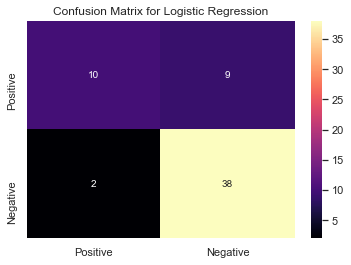

In [47]:
print('Logistic Regression Model Accuracy : %f' %model_logit_accuracy)
print('\nLogistic Regression Classification Report : \n', model_logit_cp)
print('\nLogistic Regression Confusion Matrix : \n', model_logit_cm)
print('True Positive : ', model_logit_cm[1][1])
print('False Positive : ', model_logit_cm[0][1])
print('False Negative : ', model_logit_cm[1][0])
print('True Negative : ', model_logit_cm[0][0])

class_label = ["Positive", "Negative"]
logit_cm = pd.DataFrame(model_logit_cm, index=class_label, columns=class_label)
plt.title('Confusion Matrix for Logistic Regression')
sns.heatmap(logit_cm, cmap='magma',annot=True, fmt='d')
plt.show()

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>Accuracy using Logistic Regression Model is 81.3%</li>
</ul>
</font>

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Model - K-Nearest Neighbors :
<font color=darkblue>
</font>

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Determine Optimal K :
<font color=darkblue>
Find the best K value using Misclassification error
</font>

In [48]:
nList = list(range(1,20))
neighbors = list(filter(lambda x: x % 2 != 0, nList))

ac_scores = []

# Perform accuracy metrics for odd numbers (1 to 19)
for k in neighbors:
    model_knn = KNeighborsClassifier(n_neighbors=k)
    model_knn.fit(X_train_scaled, y_train.values.ravel())
    model_knn_y_predicted = model_knn.predict(X_test_scaled)
    model_knn_score = accuracy_score(y_test, model_knn_y_predicted)
    ac_scores.append(model_knn_score)

MSE = [1 - x for x in ac_scores]
optimal_k = neighbors[MSE.index(min(MSE))]

In [49]:
# print accuracy scores, misclassification error and optimal k value
print('\nOdd Neighbors : \n', neighbors)
print('\nAccuracy Scores : \n', ac_scores)
print('\nMisclassification Error : \n', MSE)
print("\nOptimal number of neighbors is k=%d" % optimal_k)



Odd Neighbors : 
 [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

Accuracy Scores : 
 [0.9152542372881356, 0.9152542372881356, 0.847457627118644, 0.8305084745762712, 0.7966101694915254, 0.7457627118644068, 0.7457627118644068, 0.7457627118644068, 0.7457627118644068, 0.7457627118644068]

Misclassification Error : 
 [0.0847457627118644, 0.0847457627118644, 0.15254237288135597, 0.1694915254237288, 0.2033898305084746, 0.2542372881355932, 0.2542372881355932, 0.2542372881355932, 0.2542372881355932, 0.2542372881355932]

Optimal number of neighbors is k=1


#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
Optimal K value is 1
</font>

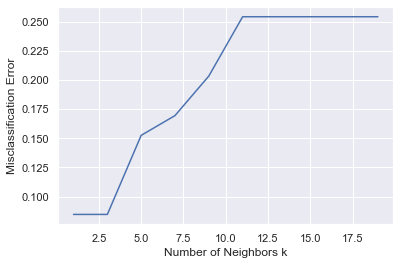

In [50]:
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors k')
plt.ylabel('Misclassification Error')
plt.show()

In [51]:
model_knn = KNeighborsClassifier(n_neighbors=optimal_k, weights='uniform', metric='euclidean')
model_knn.fit(X_train, y_train)
model_knn_y_predicted = model_knn.predict(X_test)
model_knn_accuracy = accuracy_score(y_test, model_knn_y_predicted)
model_knn_cm = metrics.confusion_matrix(y_test, model_knn_y_predicted)
model_knn_cp = classification_report(y_test, model_knn_y_predicted)

KNN Model Accuracy : 0.813559

KNN Classification Report : 
               precision    recall  f1-score   support

           0       0.75      0.63      0.69        19
           1       0.84      0.90      0.87        40

    accuracy                           0.81        59
   macro avg       0.79      0.77      0.78        59
weighted avg       0.81      0.81      0.81        59


KNN Confusion Matrix : 
 [[12  7]
 [ 4 36]]
True Positive :  36
False Positive :  7
False Negative :  4
True Negative :  12


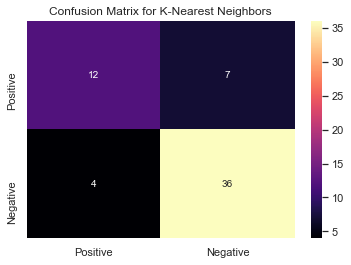

In [52]:
print('KNN Model Accuracy : %f' %model_knn_accuracy)
print('\nKNN Classification Report : \n', model_knn_cp)
print('\nKNN Confusion Matrix : \n', model_knn_cm)
print('True Positive : ', model_knn_cm[1][1])
print('False Positive : ', model_knn_cm[0][1])
print('False Negative : ', model_knn_cm[1][0])
print('True Negative : ', model_knn_cm[0][0])

class_label = ["Positive", "Negative"]
knn_cm = pd.DataFrame(model_knn_cm, index=class_label, columns=class_label)
plt.title('Confusion Matrix for K-Nearest Neighbors')
sns.heatmap(knn_cm, cmap='magma',annot=True, fmt='d')
plt.show()

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>Accuracy using K-Nearest Neighbor Model is 81.3%</li>
</ul>
</font>

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Model - Naive Bayes :
<font color=darkblue>
</font>

In [53]:
model_gnb = GaussianNB()
model_gnb.fit(X_train, y_train)


GaussianNB(priors=None, var_smoothing=1e-09)

In [54]:
model_gnb_y_predicted = model_gnb.predict(X_test)
model_gnb_score = model_gnb.score(X_test, y_test)
model_gnb_accuracy = accuracy_score(y_test, model_gnb_y_predicted)
model_gnb_cm = metrics.confusion_matrix(y_test, model_gnb_y_predicted)
model_gnb_cp = classification_report(y_test, model_gnb_y_predicted)

Naive Bayes Model Accuracy : 0.711864

Naive Bayes Classification Report : 
               precision    recall  f1-score   support

           0       0.53      0.95      0.68        19
           1       0.96      0.60      0.74        40

    accuracy                           0.71        59
   macro avg       0.74      0.77      0.71        59
weighted avg       0.82      0.71      0.72        59


Naive Bayes Confusion Matrix : 
 [[18  1]
 [16 24]]
True Positive :  24
False Positive :  1
False Negative :  16
True Negative :  18


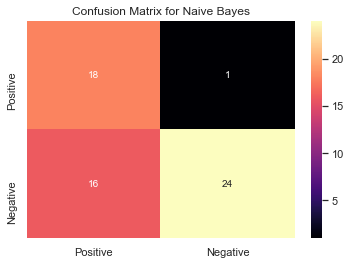

In [55]:
print('Naive Bayes Model Accuracy : %f' %model_gnb_accuracy)
print('\nNaive Bayes Classification Report : \n', model_gnb_cp)
print('\nNaive Bayes Confusion Matrix : \n', model_gnb_cm)
print('True Positive : ', model_gnb_cm[1][1])
print('False Positive : ', model_gnb_cm[0][1])
print('False Negative : ', model_gnb_cm[1][0])
print('True Negative : ', model_gnb_cm[0][0])

class_label = ["Positive", "Negative"]
gnb_cm = pd.DataFrame(model_gnb_cm, index=class_label, columns=class_label)
plt.title('Confusion Matrix for Naive Bayes')
sns.heatmap(gnb_cm, cmap='magma',annot=True, fmt='d')
plt.show()

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>Accuracy using Naive Bayes Model is 71.1%</li>
</ul>
</font>

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Model - Support Vector Machine :
<font color=darkblue>
</font>

In [56]:
model_svc = SVC(random_state=1)
model_svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [57]:
model_svc_y_predicted = model_svc.predict(X_test)
model_svc_score = model_svc.score(X_test, y_test)
model_svc_accuracy = accuracy_score(y_test, model_svc_y_predicted)
model_svc_cm = metrics.confusion_matrix(y_test, model_svc_y_predicted)
model_svc_cp = classification_report(y_test, model_svc_y_predicted)

Support Vector Machine Model Accuracy : 0.745763

Support Vector Machine Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.21      0.35        19
           1       0.73      1.00      0.84        40

    accuracy                           0.75        59
   macro avg       0.86      0.61      0.59        59
weighted avg       0.82      0.75      0.68        59


Support Vector Machine Confusion Matrix : 
 [[ 4 15]
 [ 0 40]]
True Positive :  40
False Positive :  15
False Negative :  0
True Negative :  4


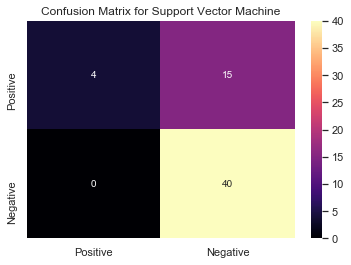

In [58]:
print('Support Vector Machine Model Accuracy : %f' %model_svc_accuracy)
print('\nSupport Vector Machine Classification Report : \n', model_svc_cp)
print('\nSupport Vector Machine Confusion Matrix : \n', model_svc_cm)
print('True Positive : ', model_svc_cm[1][1])
print('False Positive : ', model_svc_cm[0][1])
print('False Negative : ', model_svc_cm[1][0])
print('True Negative : ', model_svc_cm[0][0])

class_label = ["Positive", "Negative"]
svc_cm = pd.DataFrame(model_svc_cm, index=class_label, columns=class_label)
plt.title('Confusion Matrix for Support Vector Machine')
sns.heatmap(svc_cm, cmap='magma',annot=True, fmt='d')
plt.show()

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>Accuracy using Support Vector Machine Model is 74.5%</li>
</ul>
</font>

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Train a Meta Classifier (Stacking) :
<font color=darkblue>
We will use KNN, Logistic Regression, Naive Bayes, Randaom Forest and Decision Tree as Base Model. And Logistic Regression as Meta Model. If the base model is better than the Meta Model, we will use Base Model else we will use Meta Model
</font>

In [59]:
# get a stacking ensemble of models
def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('Logistic Regression', LogisticRegression()))
    level0.append(('KNN', KNeighborsClassifier()))
    level0.append(('Naive Bayes', GaussianNB()))
    level0.append(('SVM', SVC()))
    level0.append(('Random Forest', RandomForestClassifier()))
    level0.append(('Decision Tree', DecisionTreeClassifier()))
    # define meta learner model
    level1 = LogisticRegression()
    # define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=3)
    return model


In [60]:
# get a list of models to evaluate
def get_models():
    models = dict()
    models['Logistic Regression'] = LogisticRegression()
    models['KNN'] = KNeighborsClassifier()
    models['Naive Bayes'] = GaussianNB()
    models['SVM'] = SVC()
    models['Random Forest'] = RandomForestClassifier()
    models['Decision Tree'] = DecisionTreeClassifier()
    models['Stacking Classifier'] = get_stacking()
    return models


In [61]:
# evaluate a give model using cross-validation
def evaluate_model(model):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = model_selection.cross_val_score(model, X_test, y_test, scoring='accuracy', 
                                             cv=cv, n_jobs=-1, error_score='raise')
    return scores

3-fold cross validation:

Logistic Regression Accuracy : 0.76 (0.18)
KNN Accuracy : 0.72 (0.16)
Naive Bayes Accuracy : 0.71 (0.19)
SVM Accuracy : 0.73 (0.12)
Random Forest Accuracy : 0.82 (0.16)
Decision Tree Accuracy : 0.79 (0.14)
Stacking Classifier Accuracy : 0.79 (0.17)


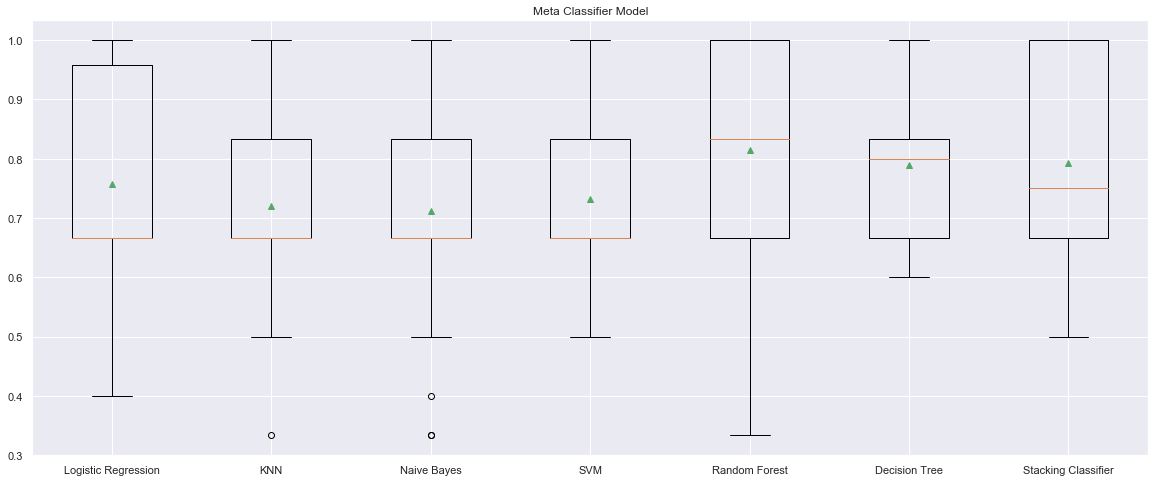

In [62]:
# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()

print('3-fold cross validation:\n')

for name, model in models.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    print('%s Accuracy : %.2f (%.2f)' % (name, scores.mean(), scores.std()))

plt.figure(figsize=(20,8))
plt.title('Meta Classifier Model')
plt.boxplot(results, labels=names, showmeans=True)
plt.show()


#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>Here Random Forest Model (with 82% accuracy) as base model is better than Stacking Ensemble model (with 79% accuracy)</li>
</ul>
</font>

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Model - Decision Tree :
<font color=darkblue>
</font>

In [63]:
model_dt = DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=5, random_state=1)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [64]:
model_dt_y_predicted = model_dt.predict(X_test)
model_dt_score = model_dt.score(X_test, y_test)
model_dt_accuracy = accuracy_score(y_test, model_dt_y_predicted)
model_dt_cm = metrics.confusion_matrix(y_test, model_dt_y_predicted)
model_dt_cp = classification_report(y_test, model_dt_y_predicted)

Decision Tree Model Accuracy : 0.898305

Decision Tree Classification Report : 
               precision    recall  f1-score   support

           0       0.93      0.74      0.82        19
           1       0.89      0.97      0.93        40

    accuracy                           0.90        59
   macro avg       0.91      0.86      0.88        59
weighted avg       0.90      0.90      0.89        59


Decision Tree Confusion Matrix : 
 [[14  5]
 [ 1 39]]
True Positive :  39
False Positive :  5
False Negative :  1
True Negative :  14


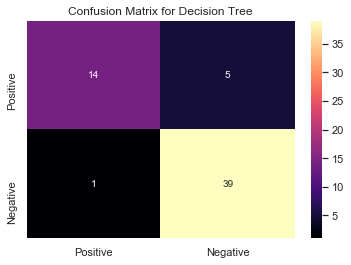

In [65]:
print('Decision Tree Model Accuracy : %f' %model_dt_accuracy)
print('\nDecision Tree Classification Report : \n', model_dt_cp)
print('\nDecision Tree Confusion Matrix : \n', model_dt_cm)
print('True Positive : ', model_dt_cm[1][1])
print('False Positive : ', model_dt_cm[0][1])
print('False Negative : ', model_dt_cm[1][0])
print('True Negative : ', model_dt_cm[0][0])

class_label = ["Positive", "Negative"]
dt_cm = pd.DataFrame(model_dt_cm, index=class_label, columns=class_label)
plt.title('Confusion Matrix for Decision Tree')
sns.heatmap(dt_cm, cmap='magma',annot=True, fmt='d')
plt.show()

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>Accuracy using Decision Tree Model is 89.8%</li>
</ul>
</font>

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Visualizing Decision Tree :
<font color=darkblue>
</font>

In [67]:
from sklearn.tree import export_graphviz

train_char_label = ['No', 'Yes']
Parkinson_Tree_File = open('parkinson_tree.dot', 'w')
dot_data = export_graphviz(model_dt, out_file=Parkinson_Tree_File, 
                           feature_names=list(X_train), 
                           class_names=list(train_char_label))
Parkinson_Tree_File.close()

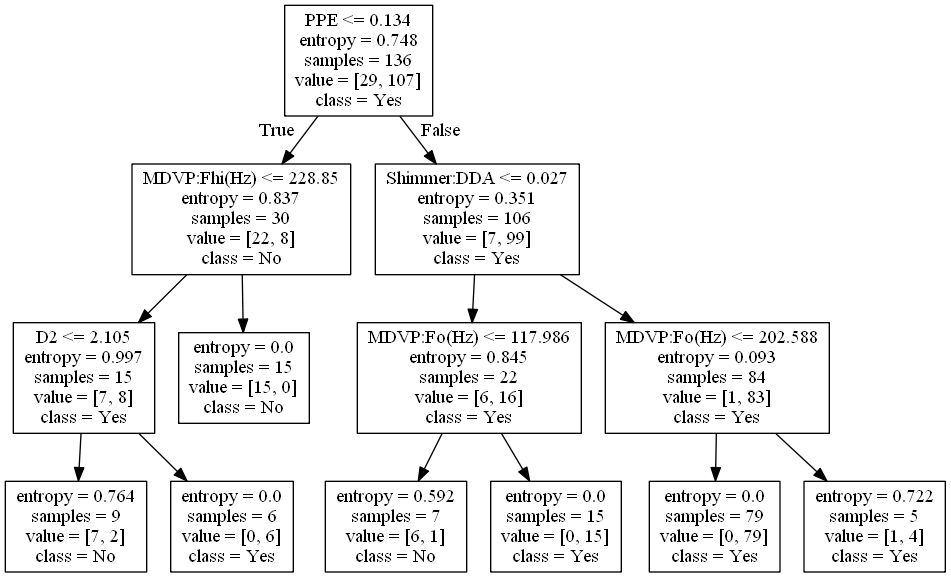

In [68]:
from os import system
from IPython.display import Image

retCode = system("dot -Tpng parkinson_tree.dot -o parkinson_tree.png")
if(retCode > 0):
    print("system command returning error : " + str(retCode))
else:
    display(Image("parkinson_tree.png"))


### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Ensemble Model :
<font color=darkblue>
</font>

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Model - Bagging :
<font color=darkblue>
</font>

In [69]:
model_bg = BaggingClassifier(base_estimator=model_dt, n_estimators=50, max_samples=.7, bootstrap=True, random_state=1)
model_bg.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='entropy',
                                                        max_depth=6,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=5,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=1,
   

In [70]:
model_bg_y_predicted = model_bg.predict(X_test)
model_bg_score = model_bg.score(X_test, y_test)
model_bg_accuracy = accuracy_score(y_test, model_bg_y_predicted)
model_bg_cm = metrics.confusion_matrix(y_test, model_bg_y_predicted)
model_bg_cp = classification_report(y_test, model_bg_y_predicted)

Gradient Boosting Model Accuracy : 0.847458

Gradient Boosting Classification Report : 
               precision    recall  f1-score   support

           0       0.92      0.58      0.71        19
           1       0.83      0.97      0.90        40

    accuracy                           0.85        59
   macro avg       0.87      0.78      0.80        59
weighted avg       0.86      0.85      0.84        59


Gradient Boosting Confusion Matrix : 
 [[11  8]
 [ 1 39]]
True Positive :  39
False Positive :  8
False Negative :  1
True Negative :  11


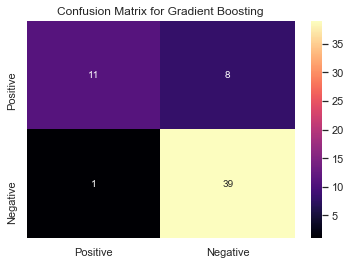

In [71]:
print('Gradient Boosting Model Accuracy : %f' %model_bg_accuracy)
print('\nGradient Boosting Classification Report : \n', model_bg_cp)
print('\nGradient Boosting Confusion Matrix : \n', model_bg_cm)
print('True Positive : ', model_bg_cm[1][1])
print('False Positive : ', model_bg_cm[0][1])
print('False Negative : ', model_bg_cm[1][0])
print('True Negative : ', model_bg_cm[0][0])

class_label = ["Positive", "Negative"]
bg_cm = pd.DataFrame(model_bg_cm, index=class_label, columns=class_label)
plt.title('Confusion Matrix for Gradient Boosting')
sns.heatmap(bg_cm, cmap='magma',annot=True, fmt='d')
plt.show()

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>Accuracy using Bagging - Ensemble Model is 84.7%</li>
</ul>
</font>

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Model - Random Forest :
<font color=darkblue>
</font>

In [72]:
model_rf = RandomForestClassifier(criterion='gini', n_estimators=50, max_depth=6, min_samples_leaf=5, random_state=1)
model_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [73]:
model_rf_y_predicted = model_rf.predict(X_test)
model_rf_score = model_rf.score(X_test, y_test)
model_rf_accuracy = accuracy_score(y_test, model_rf_y_predicted)
model_rf_cm = metrics.confusion_matrix(y_test, model_rf_y_predicted)
model_rf_cp = classification_report(y_test, model_rf_y_predicted)

Random Forest Model Accuracy : 0.813559

Random Forest Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.42      0.59        19
           1       0.78      1.00      0.88        40

    accuracy                           0.81        59
   macro avg       0.89      0.71      0.74        59
weighted avg       0.85      0.81      0.79        59


Random Forest Confusion Matrix : 
 [[ 8 11]
 [ 0 40]]
True Positive :  40
False Positive :  11
False Negative :  0
True Negative :  8


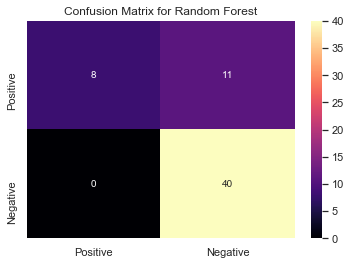

In [74]:
print('Random Forest Model Accuracy : %f' %model_rf_accuracy)
print('\nRandom Forest Classification Report : \n', model_rf_cp)
print('\nRandom Forest Confusion Matrix : \n', model_rf_cm)
print('True Positive : ', model_rf_cm[1][1])
print('False Positive : ', model_rf_cm[0][1])
print('False Negative : ', model_rf_cm[1][0])
print('True Negative : ', model_rf_cm[0][0])

class_label = ["Positive", "Negative"]
rf_cm = pd.DataFrame(model_rf_cm, index=class_label, columns=class_label)
plt.title('Confusion Matrix for Random Forest')
sns.heatmap(rf_cm, cmap='magma',annot=True, fmt='d')
plt.show()

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>Accuracy using Random Forest - Ensemble Model is 81.3%</li>
</ul>
</font>

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Model - Ada Boosting :
<font color=darkblue>
</font>

In [75]:
model_ab = AdaBoostClassifier(base_estimator=model_dt, n_estimators=50, random_state=1)
model_ab.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='entropy',
                                                         max_depth=6,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=5,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                       

In [76]:
model_ab_y_predicted = model_ab.predict(X_test)
model_ab_score = model_ab.score(X_test, y_test)
model_ab_accuracy = accuracy_score(y_test, model_ab_y_predicted)
model_ab_cm = metrics.confusion_matrix(y_test, model_ab_y_predicted)
model_ab_cp = classification_report(y_test, model_ab_y_predicted)

Ada Boosting Model Accuracy : 0.898305

Ada Boosting Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.68      0.81        19
           1       0.87      1.00      0.93        40

    accuracy                           0.90        59
   macro avg       0.93      0.84      0.87        59
weighted avg       0.91      0.90      0.89        59


Ada Boosting Confusion Matrix : 
 [[13  6]
 [ 0 40]]
True Positive :  40
False Positive :  6
False Negative :  0
True Negative :  13


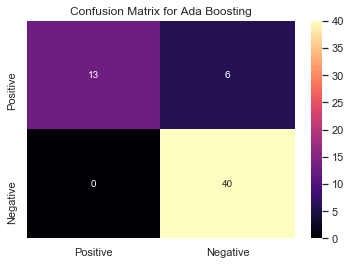

In [77]:
print('Ada Boosting Model Accuracy : %f' %model_ab_accuracy)
print('\nAda Boosting Classification Report : \n', model_ab_cp)
print('\nAda Boosting Confusion Matrix : \n', model_ab_cm)
print('True Positive : ', model_ab_cm[1][1])
print('False Positive : ', model_ab_cm[0][1])
print('False Negative : ', model_ab_cm[1][0])
print('True Negative : ', model_ab_cm[0][0])

class_label = ["Positive", "Negative"]
ab_cm = pd.DataFrame(model_ab_cm, index=class_label, columns=class_label)
plt.title('Confusion Matrix for Ada Boosting')
sns.heatmap(ab_cm, cmap='magma',annot=True, fmt='d')
plt.show()

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>Accuracy using Ada Boosting - Ensemble Model is 89.8%</li>
</ul>
</font>

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Model - Gradient Boosting :
<font color=darkblue>
</font>

In [78]:
model_gb = GradientBoostingClassifier(n_estimators=50, random_state=1)
model_gb.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [79]:
model_gb_y_predicted = model_gb.predict(X_test)
model_gb_score = model_gb.score(X_test, y_test)
model_gb_accuracy = accuracy_score(y_test, model_gb_y_predicted)
model_gb_cm = metrics.confusion_matrix(y_test, model_gb_y_predicted)
model_gb_cp = classification_report(y_test, model_gb_y_predicted)

Gradient Boosting Model Accuracy : 0.881356

Gradient Boosting Classification Report : 
               precision    recall  f1-score   support

           0       0.88      0.74      0.80        19
           1       0.88      0.95      0.92        40

    accuracy                           0.88        59
   macro avg       0.88      0.84      0.86        59
weighted avg       0.88      0.88      0.88        59


Gradient Boosting Confusion Matrix : 
 [[14  5]
 [ 2 38]]
True Positive :  38
False Positive :  5
False Negative :  2
True Negative :  14


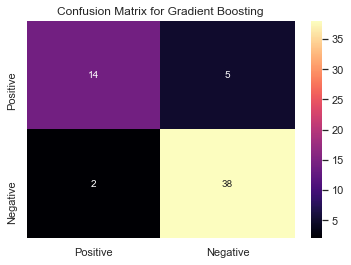

In [80]:
print('Gradient Boosting Model Accuracy : %f' %model_gb_accuracy)
print('\nGradient Boosting Classification Report : \n', model_gb_cp)
print('\nGradient Boosting Confusion Matrix : \n', model_gb_cm)
print('True Positive : ', model_gb_cm[1][1])
print('False Positive : ', model_gb_cm[0][1])
print('False Negative : ', model_gb_cm[1][0])
print('True Negative : ', model_gb_cm[0][0])

class_label = ["Positive", "Negative"]
gb_cm = pd.DataFrame(model_gb_cm, index=class_label, columns=class_label)
plt.title('Confusion Matrix for Gradient Boosting')
sns.heatmap(gb_cm, cmap='magma',annot=True, fmt='d')
plt.show()

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>Accuracy using Gradient Boosting - Ensemble Model is 88.1%</li>
</ul>
</font>

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Model Evaluation :
<font color=darkblue>
</font>

In [81]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('BC', BaggingClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('AB', AdaBoostClassifier()))
models.append(('GB', GradientBoostingClassifier()))

results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=20, random_state=100)
    cv_results = model_selection.cross_val_score(model, X_Indepenent, Y_Target, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    res = "%s : %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(res)

LR : 0.819444 (0.276952)
KNN : 0.733889 (0.283028)
NB : 0.681667 (0.265094)
SVM : 0.783889 (0.300359)
DT : 0.713333 (0.304242)
BC : 0.750000 (0.275983)
RF : 0.809444 (0.277473)
AB : 0.789444 (0.264749)
GB : 0.800556 (0.239508)


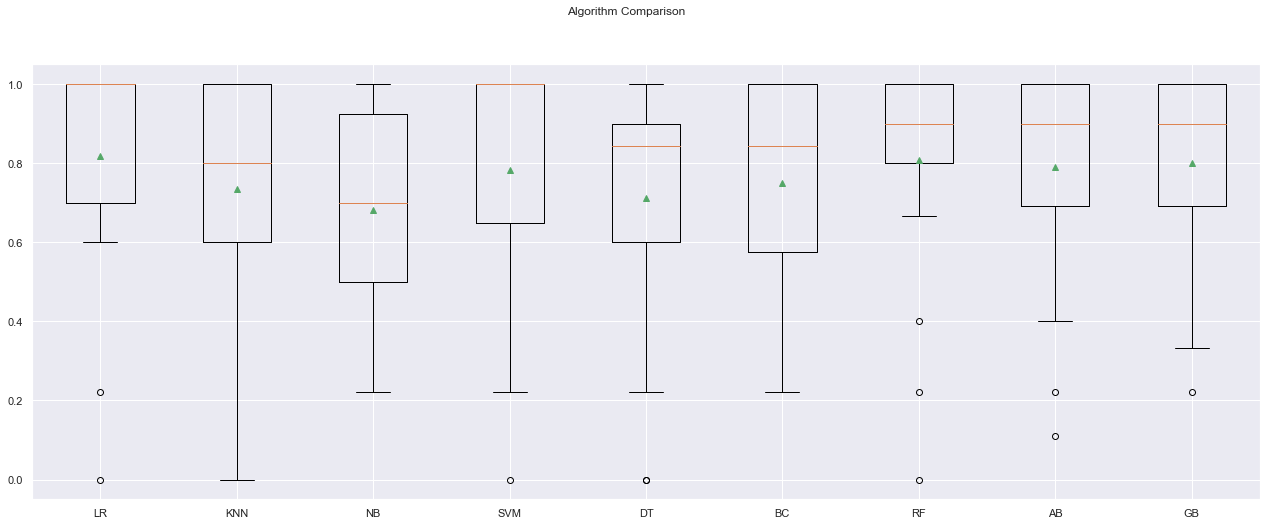

In [82]:
fig = plt.figure(figsize=(22,8))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results, showmeans=True)
ax.set_xticklabels(names)
plt.show()

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>Logistic Regression Model with Accuracy Score of 81.9% is better of all models</li>
</ul>
</font>

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Conclusion :
<font color=darkblue>
<ul>
<li>Objective is to classify patients into respective labels using measures of their voice recordings</li>
<li>We tried different Classification Models. Logistic Regression, KNN, Naive Bayes, SVM</li>
<li>We also tried Meta Classifier but Base Model Logistic Refression performed better than Meta Model</li>
<li>We tried different Decision Tree Models. CART Decision Tree, Random Forest, Bagging, Ada Boosing and Gradient Boosing</li>
<li>Of all these models, Logistic Regression Model has the highest accuracy. We will choose Logistic Regression Model as final for our evaluation</li>
</ul>
</font>